# Introduction
---
Using machine learning, we can predict the severity, location, and timing of accidents to help first responders with resource allocation and safeguard new drivers. By being able to foresee the likelihood of collisions based on driving conditions along with the fatality, the government could leverage this information to strategically position/allocate first responders across the city. Aswell, oftentimes many new drivers are exposed to unfamiliar conditions in which they do not know how to maneuver accordingly. Nationwide, almost “43% of first-year drivers are involved in accidents” (Safety Insurance Company), which is a leading concern for both drivers and the well-being of pedestrians. Modeling this problem will allow us to target and pinpoint which conditions yield the greatest risk and hence we can better prepare new drivers in the form of revised driving examinations, regulations, and information manuals.

By being able to predict the likelihood, severity, and time of accidents in certain regions, we can help first responders (paramedics, firefighters, police) be in a better position to handle the influx of accidents. There has been an extreme shortage of first responders in Canada and the ministry has been struggling to divide and disperse the workforce strategically. Interestingly with COVID-19, the workforce had taken a hit on staff supply and financial aid. Given the conditions and availability of resources, if we can correlate and predict the severity and timing of collisions, assets could be efficiently allocated to reduce stress on first responders.

In [1]:
#importing necessary libraries for initial EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

*   Initial data understanding and exploration
*   Further Understanding our problem
*   Feature Engineering
*   Cleaning the Dataset
*   Final List of Features


## Initial Data Understanding and Exploration

The dataset includes a detailed account of all motor vehicle collisions where a person involved was either killed or seriously injured in the city of Toronto, from March 2006 to September 2020. This data was last published by the Toronto Police Services on May 5th, 2021 and is refreshed annually. Each row in the dataset represents a collision, showcasing relevant info such as driving conditions, accident severity, potential cause etc. A complete breakdown of all the columns and their definitions can be found in image 1 under Appendix A.

This dataset was downloaded from the City of Toronto’s open data catalog. There are 16,860 rows of data points and 54 columns. This dataset also contains columns with a variety of data types including integer, object, and float. Some of the column names include Road_Class (road classification - object), Year (year collision occurred - integer), and Fatal_No (sequential number - float).  A detailed account of all the column names with their respective data types can be found in image 2 of Appendix A.

[Link to the dataset](https://open.toronto.ca/dataset/motor-vehicle-collisions-involving-killed-or-seriously-injured-persons/)

In [2]:
df = pd.read_csv('collisions.csv') #reading in our collisions dataset

<ipython-input-2-ee6391ad085d>:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('collisions.csv') #reading in our collisions dataset


In [3]:
df.head() #observing the first 5 rows to take a peek into the data

,_id,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,geometry
0,1,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),1,"{u'type': u'Point', u'coordinates': (-79.45249..."
1,2,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),2,"{u'type': u'Point', u'coordinates': (-79.45249..."
2,3,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,"{u'type': u'Point', u'coordinates': (-79.19978..."
3,4,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),4,"{u'type': u'Point', u'coordinates': (-79.19978..."
4,5,892682,2006,2006-03-12T00:00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,...,NaN,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),5,"{u'type': u'Point', u'coordinates': (-79.25619..."


In [4]:
df.shape #number of datapoints and features in the dataset

(16860, 54)

In [5]:
df.ndim #dimensions of loaded dataframe

2

In [6]:
#Now let's take a look at all the columns in the dataset, along with their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              16860 non-null  int64  
 1   ACCNUM           16860 non-null  int64  
 2   YEAR             16860 non-null  int64  
 3   DATE             16860 non-null  object 
 4   TIME             16860 non-null  int64  
 5   HOUR             16860 non-null  int64  
 6   STREET1          16860 non-null  object 
 7   STREET2          15350 non-null  object 
 8   OFFSET           2746 non-null   object 
 9   ROAD_CLASS       16363 non-null  object 
 10  DISTRICT         16719 non-null  object 
 11  WARDNUM          16664 non-null  object 
 12  DIVISION         16664 non-null  object 
 13  LOCCOORD         16755 non-null  object 
 14  ACCLOC           11410 non-null  object 
 15  TRAFFCTL         16831 non-null  object 
 16  VISIBILITY       16842 non-null  object 
 17  LIGHT       

## Further Understanding our Problem
As described eariler the goal of any model as it pertains to this excercise is to predict the severity of injury based
on factors involved in a collison.

Understanding the factors/combinations of factors which contribute serious injury accidents is the ultimate goal.

This Variable is defined as **INJURY** in the dataframe


In [7]:
# observing the possible injury classes
print(df['INJURY'].unique())

['None' 'Fatal' 'Minor' 'Major' 'Minimal' nan]


[Text(0.5, 1.0, 'Injury Fatality Count')]

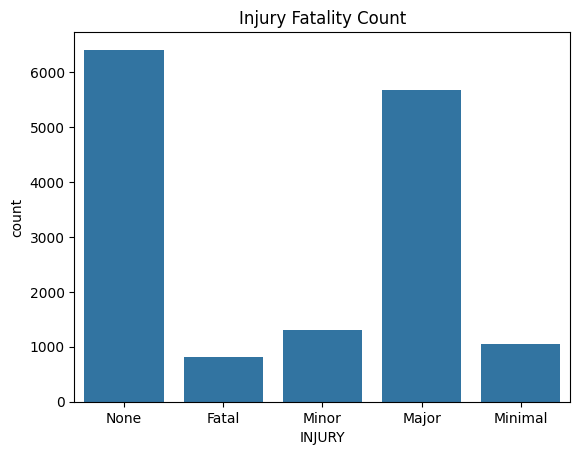

In [8]:
#countplot of INJURY fatality
sns.countplot(x = 'INJURY', data = df).set(title='Injury Fatality Count')

We find that a majority of collisions lead to no injuries, with major injuries following.

Although our focus is to be able to predict major/fatal
collisions - collisions with no injuries cannot be ignored
given their overwheliming significance statistically.

In [9]:
# split of injury fatalities
df.INJURY.value_counts()

None       6406
Major      5668
Minor      1311
Minimal    1042
Fatal       821
Name: INJURY, dtype: int64

Now that we have understood our target variable lets look at the possible features that will aid in predecting fatality level.

The following features initally listed in the project proposal will again be considered:
- Hour of day
- Road Class
- Location Coordinate
- Traffic Control Type
- Impact Type
- Apparent Driver Action
- Driver Condition
- Visibility
- Manoeuver
- Road Surface Condition
- Vehicle Type
- Pedestrian
- Truck
- Motorcycle
- Cyclist
- Involved Age

## Feature Engineering
Lets set these features up to test for correlations

Lets try and understand corellations dealing with accidents with major or fatal injuries

In [10]:
#lets try and understand corellations dealing with accidents with major or fatal
df_serious = df.loc[(df.INJURY == "Major") | (df.INJURY == "Fatal")] #Serious collisions
df_serious.head()

,_id,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,geometry
1,2,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),2,"{u'type': u'Point', u'coordinates': (-79.45249..."
2,3,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,"{u'type': u'Point', u'coordinates': (-79.19978..."
6,7,892682,2006,2006-03-12T00:00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,...,NaN,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),7,"{u'type': u'Point', u'coordinates': (-79.25619..."
8,9,892913,2006,2006-03-12T00:00:00,1903,19,OSSINGTON AVE,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,Yes,NaN,D14,81,Trinity-Bellwoods (81),9,"{u'type': u'Point', u'coordinates': (-79.42079..."
10,11,893251,2006,2006-03-15T01:00:00,1535,15,ISLINGTON AVE,DIXON RD,NaN,Major Arterial,...,NaN,NaN,NaN,NaN,NaN,D23,6,Kingsview Village-The Westway (6),11,"{u'type': u'Point', u'coordinates': (-79.54669..."


[Text(0.5, 1.0, 'Minor Injury Collision by Hour')]

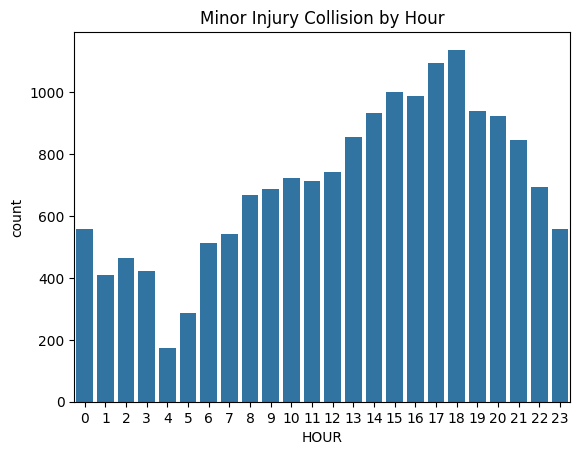

In [11]:
df_minor = df.loc[(df.INJURY != "Major") | (df.INJURY != "Fatal")]
sns.countplot(x = 'HOUR', data = df_minor).set(title='Minor Injury Collision by Hour')

[Text(0.5, 1.0, 'Major Injury Collision by Hour')]

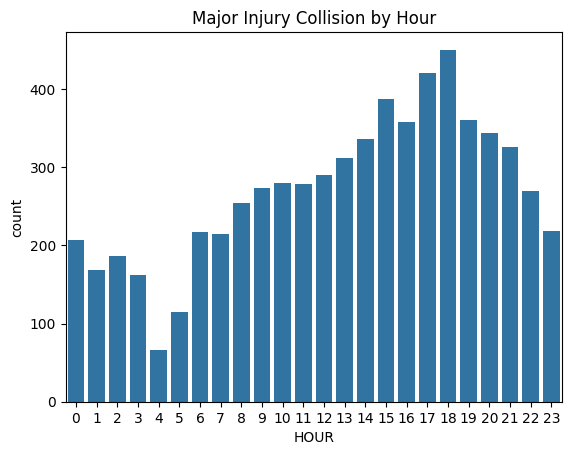

In [12]:
sns.countplot(x = 'HOUR', data = df_serious).set(title='Major Injury Collision by Hour') #countplot by hour for serious injuries

Observing the countplots for serious/non-serious injuries there is no clear distinction in terms of specific hours of the day leading to more serious injuries.

A better strategy may be to look at aspects such as driver
actions/driver conditions. Hours, visibility give indication as to collisions (which all rows in the dataset are) but specifically looking at fatal injuries one may need to consider cases where drivers had minimal control to prevent a more fatal collision.




<ipython-input-13-a614b818efa4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


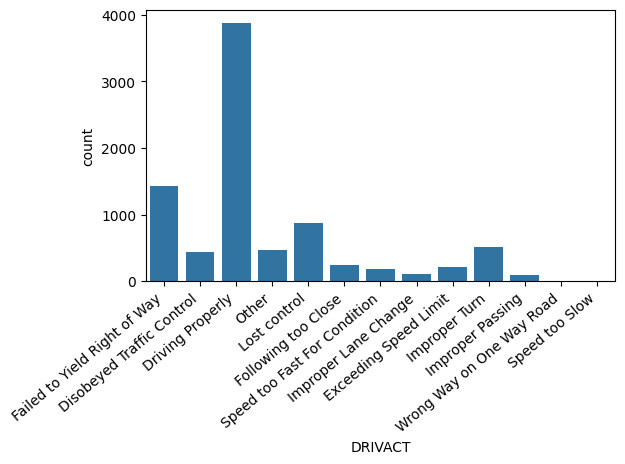

In [13]:
#countplot of driver action for minor injuries
ax = sns.countplot(x = 'DRIVACT', data = df_minor)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-14-38eb9cd21872>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


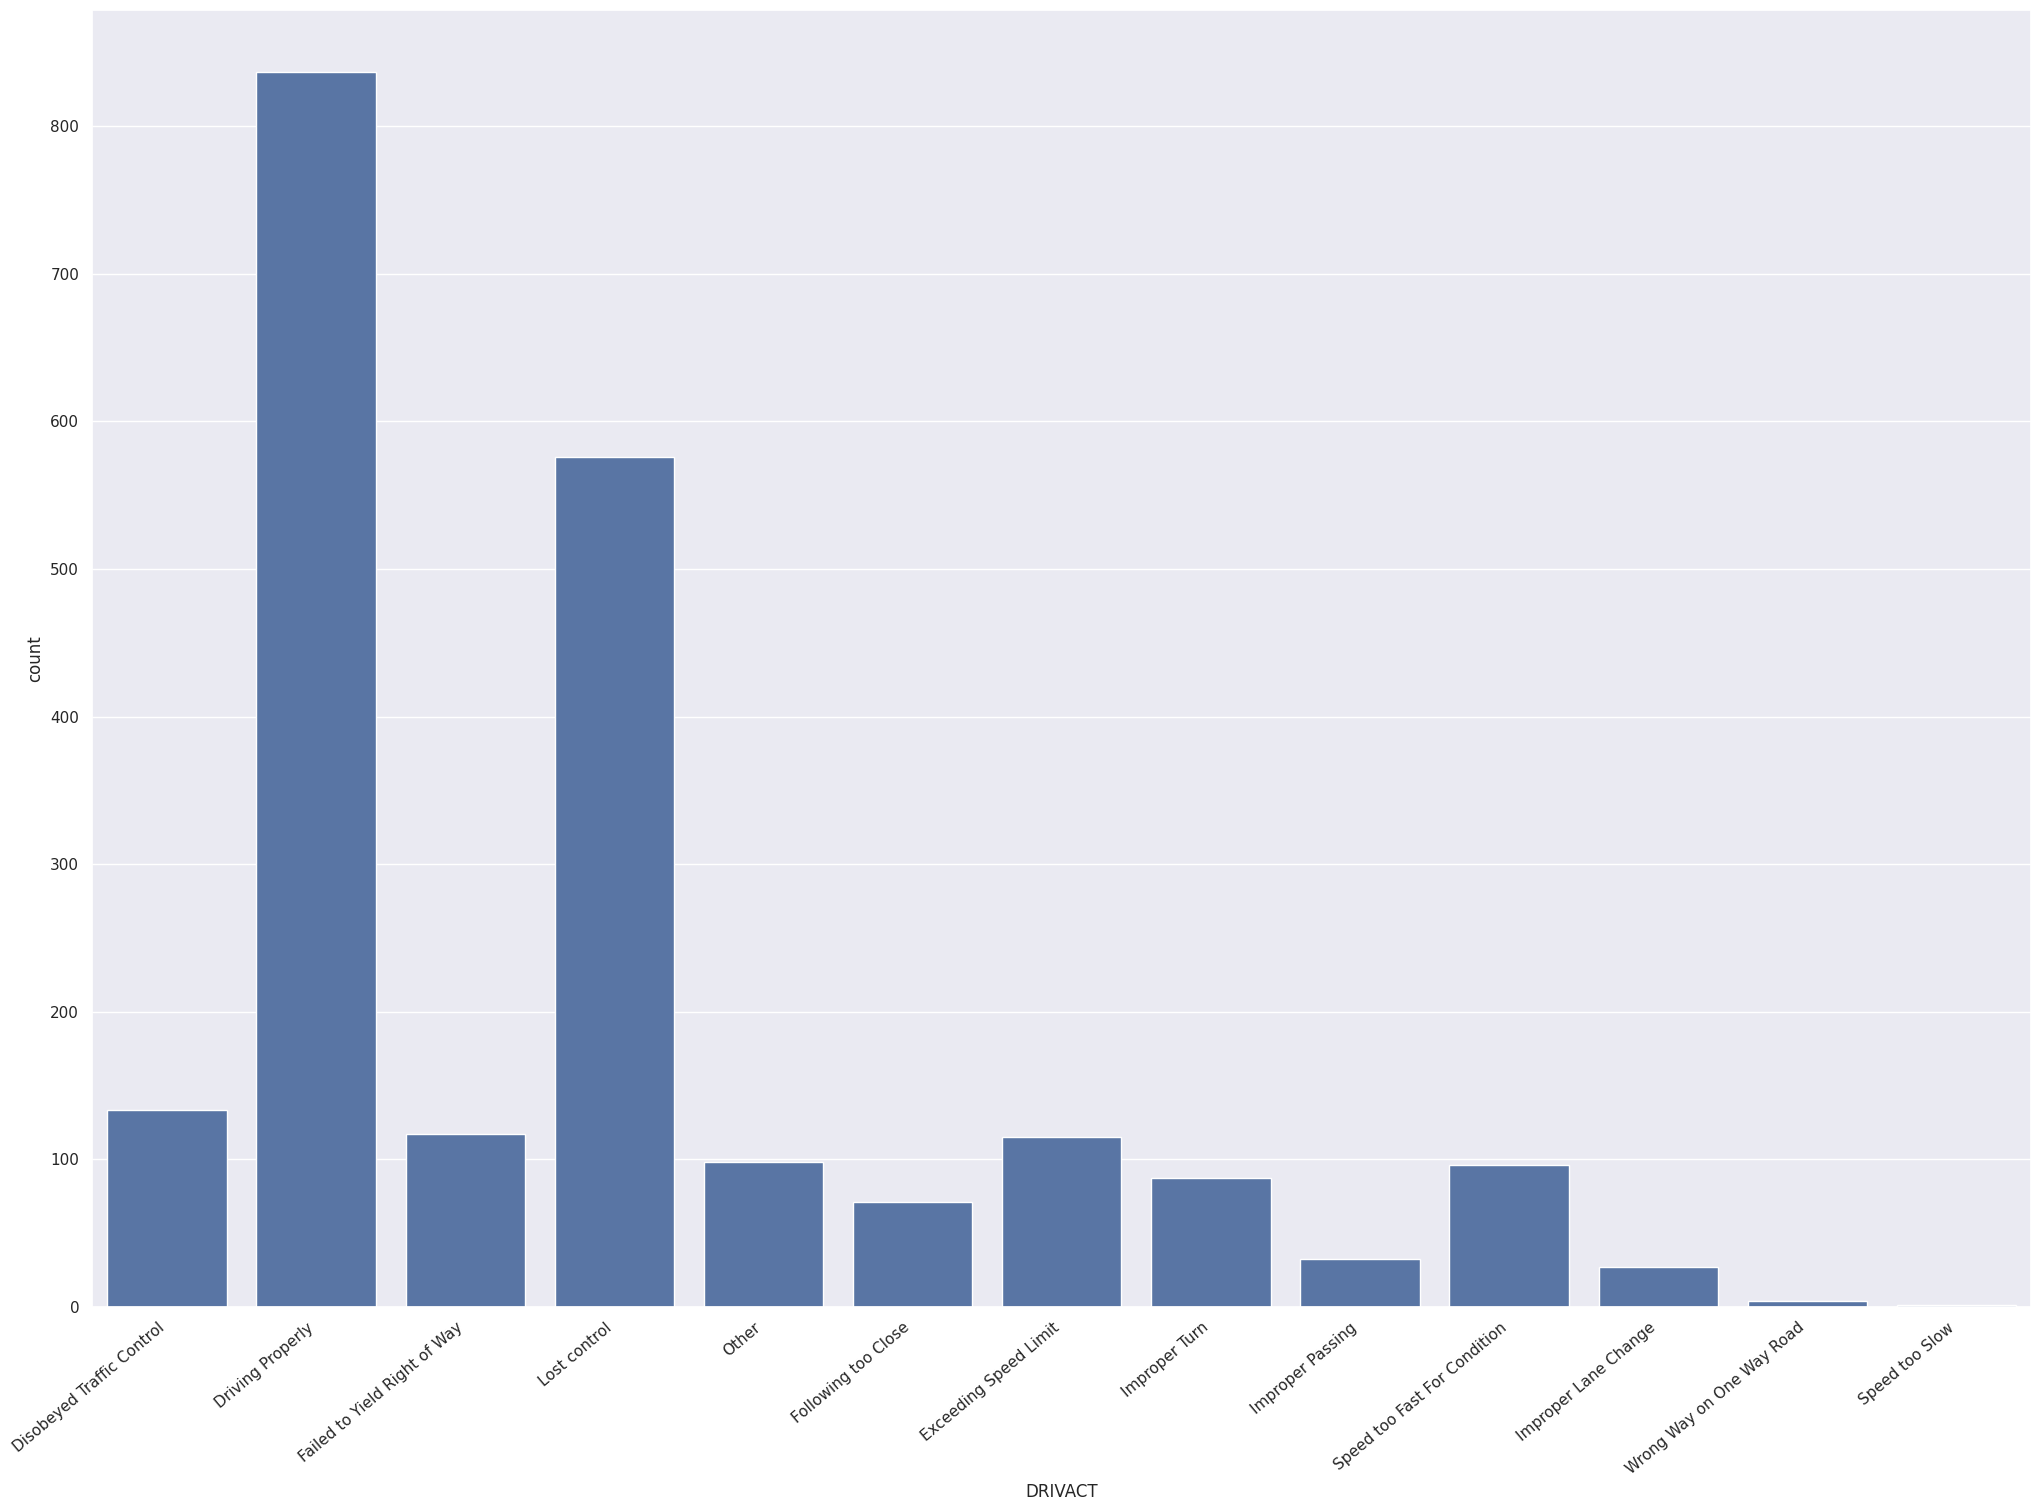

In [14]:
#countplot for driver actions with more serious injuries
ax = sns.countplot(x = 'DRIVACT', data = df_serious)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We find that more serious injuries have a much higher uptick in cases where drivers had lost control - a proxy for not being able to prevent the collision from being more severe.

To investigate more into driver control we took a look at the condition of the driver upon a vehicle collision.

<ipython-input-15-4a6bf4e71466>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


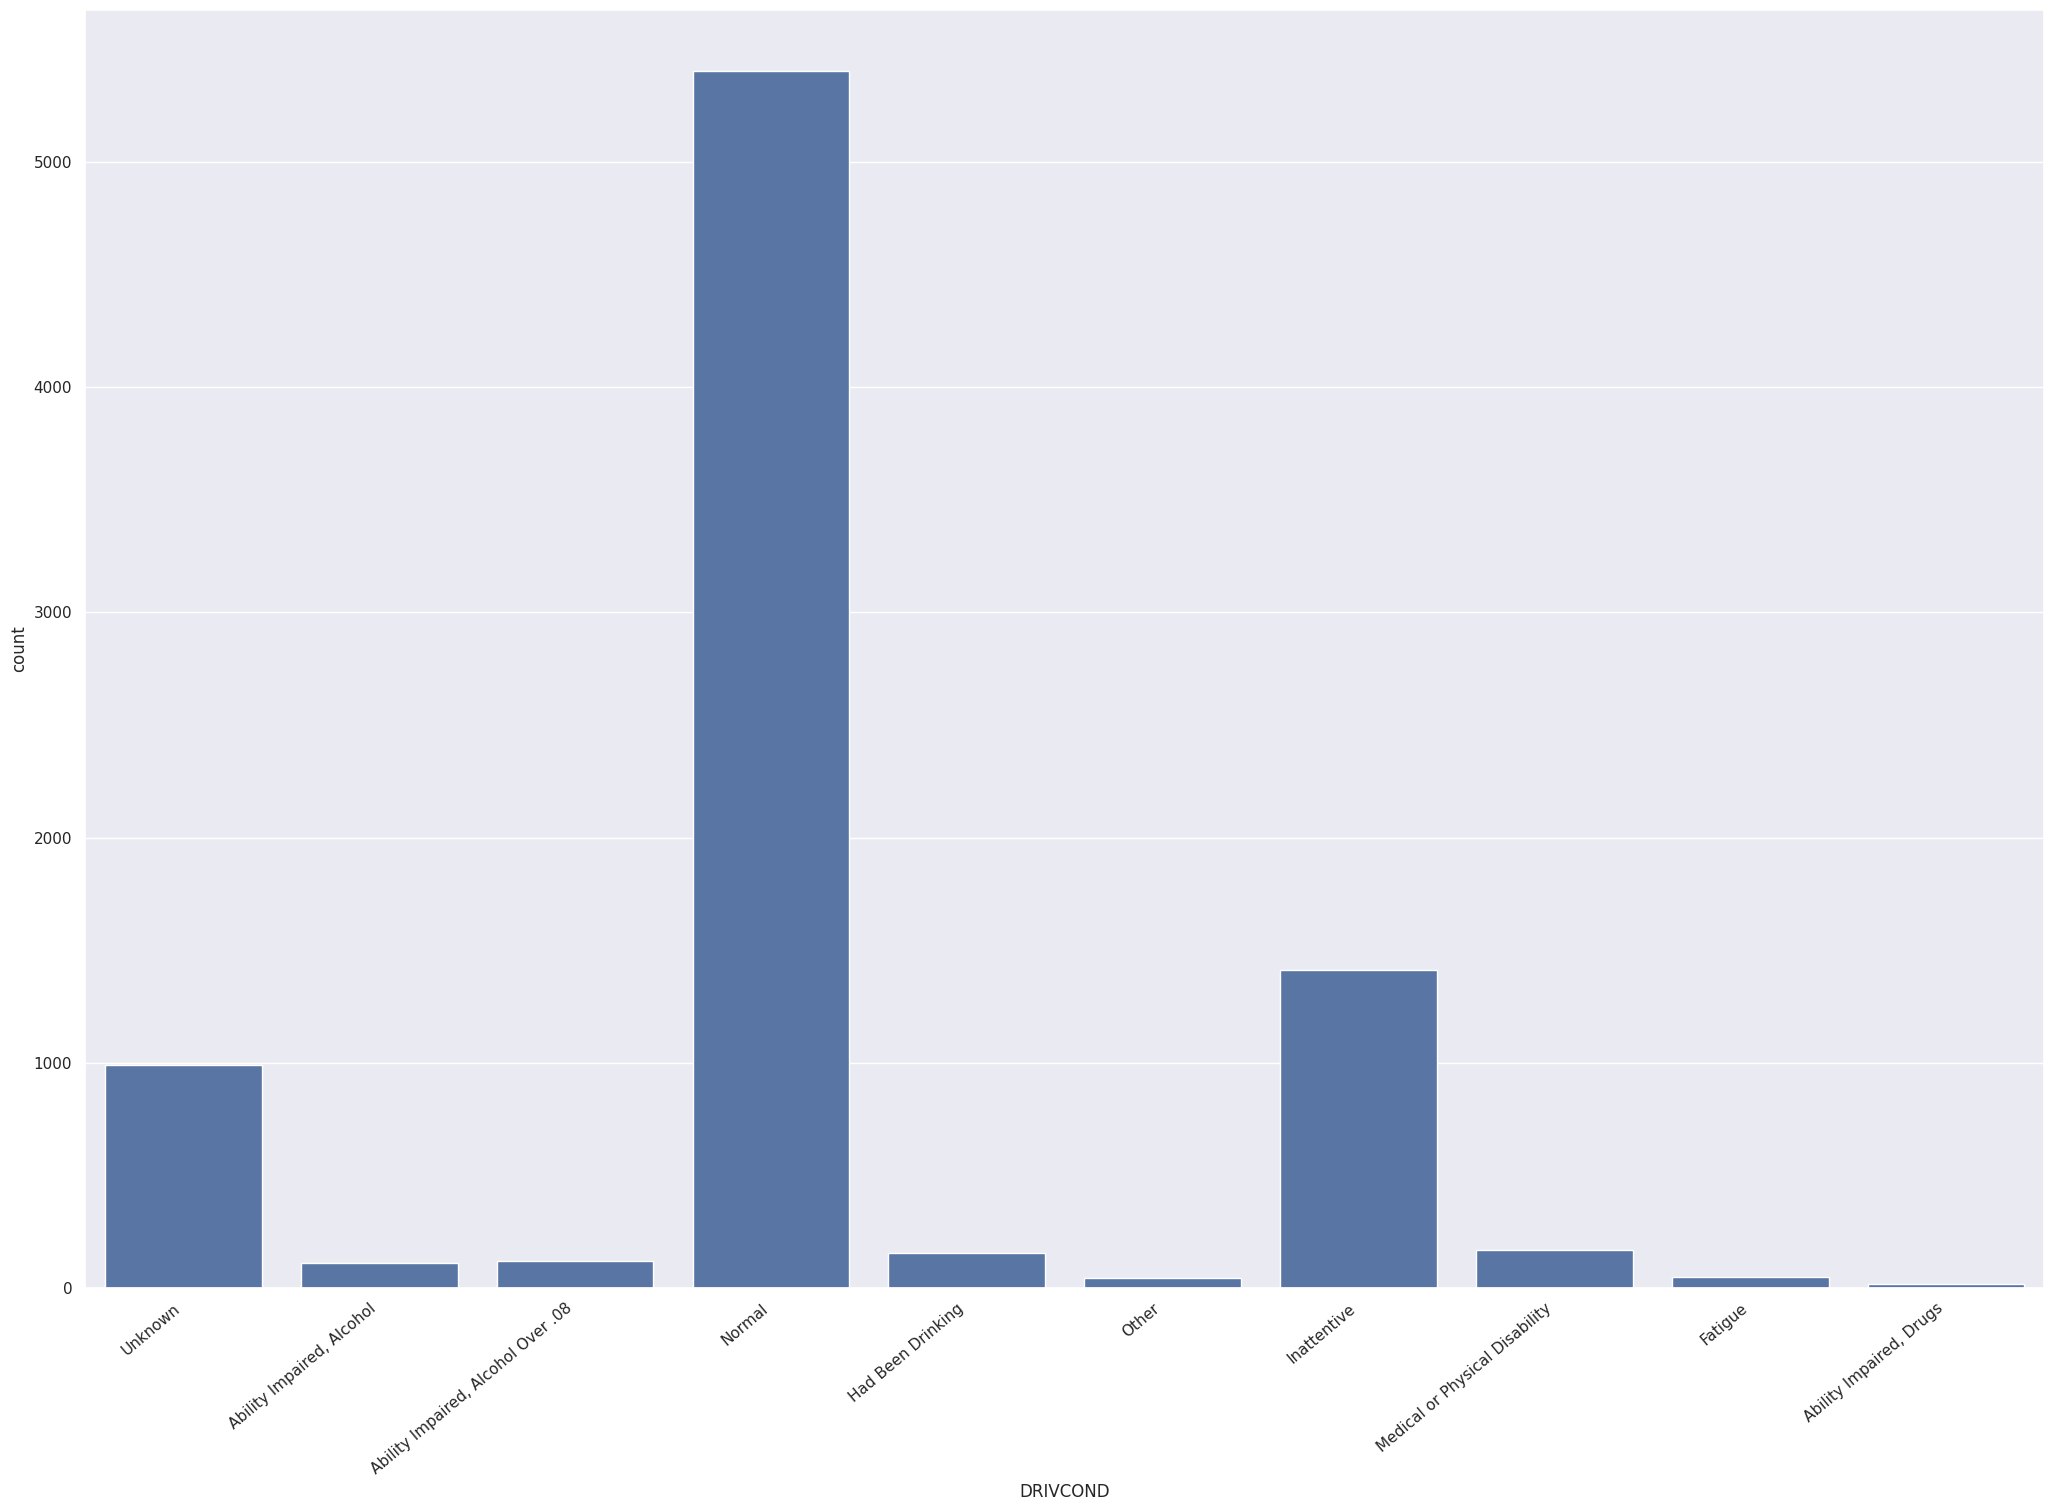

In [15]:
#countplot of driver condition for minor injuries
ax = sns.countplot(x = 'DRIVCOND', data = df_minor)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-16-11c916dc0329>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


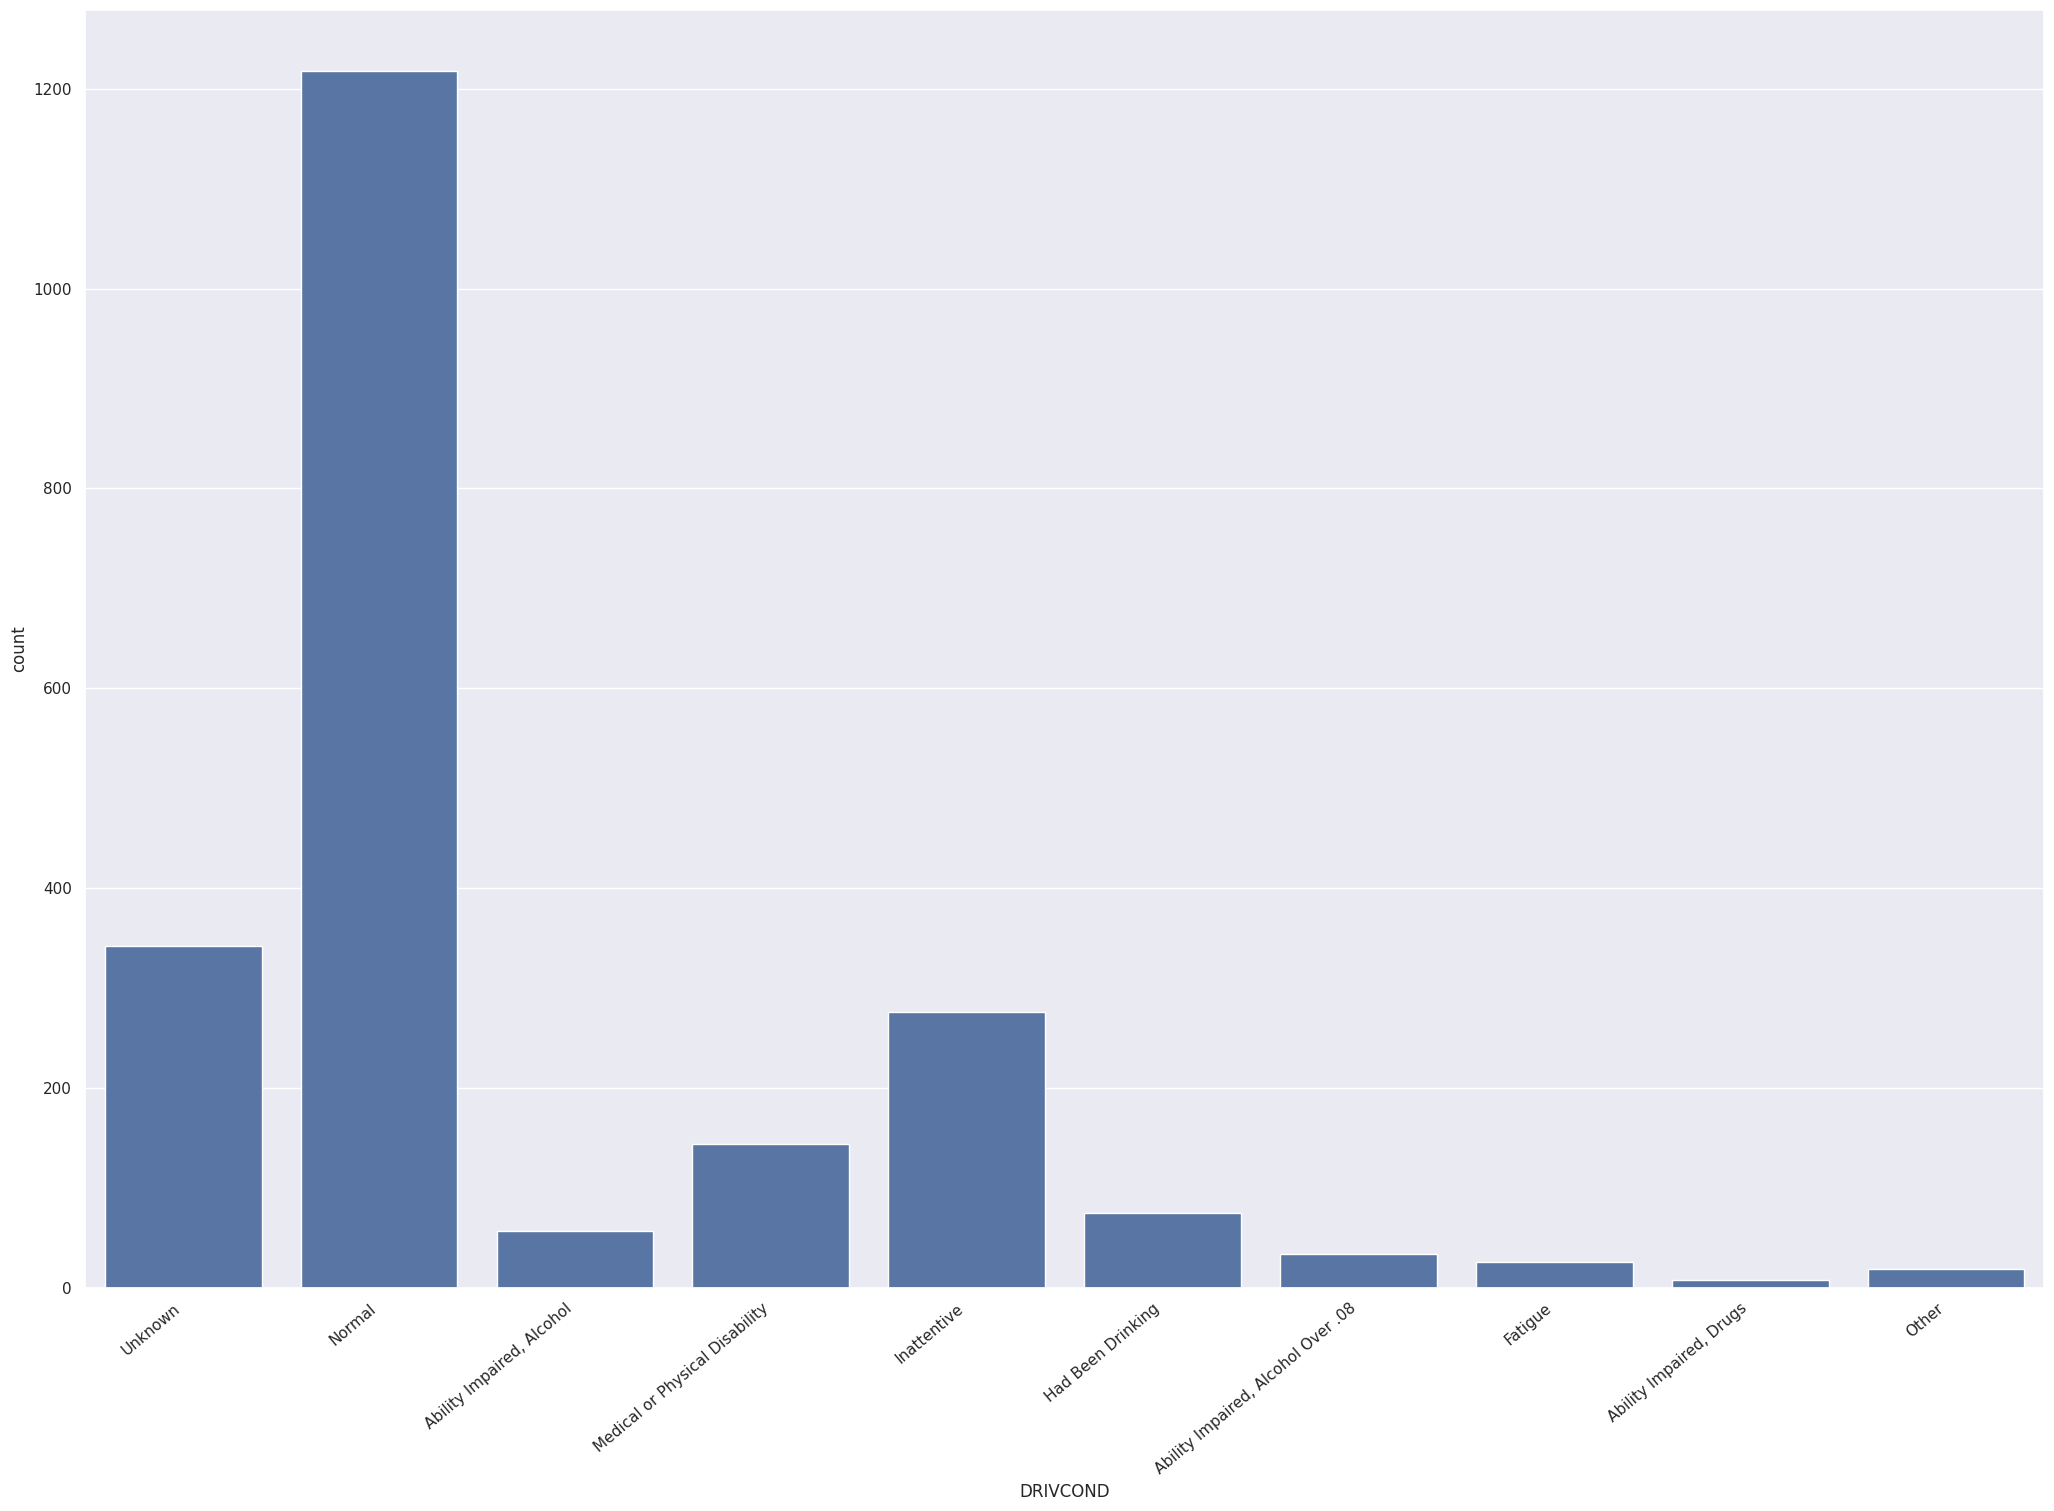

In [16]:
#countplot of driver condition for more serious injuries
ax = sns.countplot(x = 'DRIVCOND', data = df_serious)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

From the two count plots of the driver condition, we saw that drivers that were impaired and inattentive to the road resulted in a much higher probability of a major injury collision in comparison to a minor injury collision.



Another aspect to consider is the vehicles involved. Those on bikes may be more exposed to collisions leading to more serious injuries in comparison to those in vehicles. This led the team to investigate our fourth feature which was the vehicle type involved in the collision.


<ipython-input-17-1f4e28ca88d2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


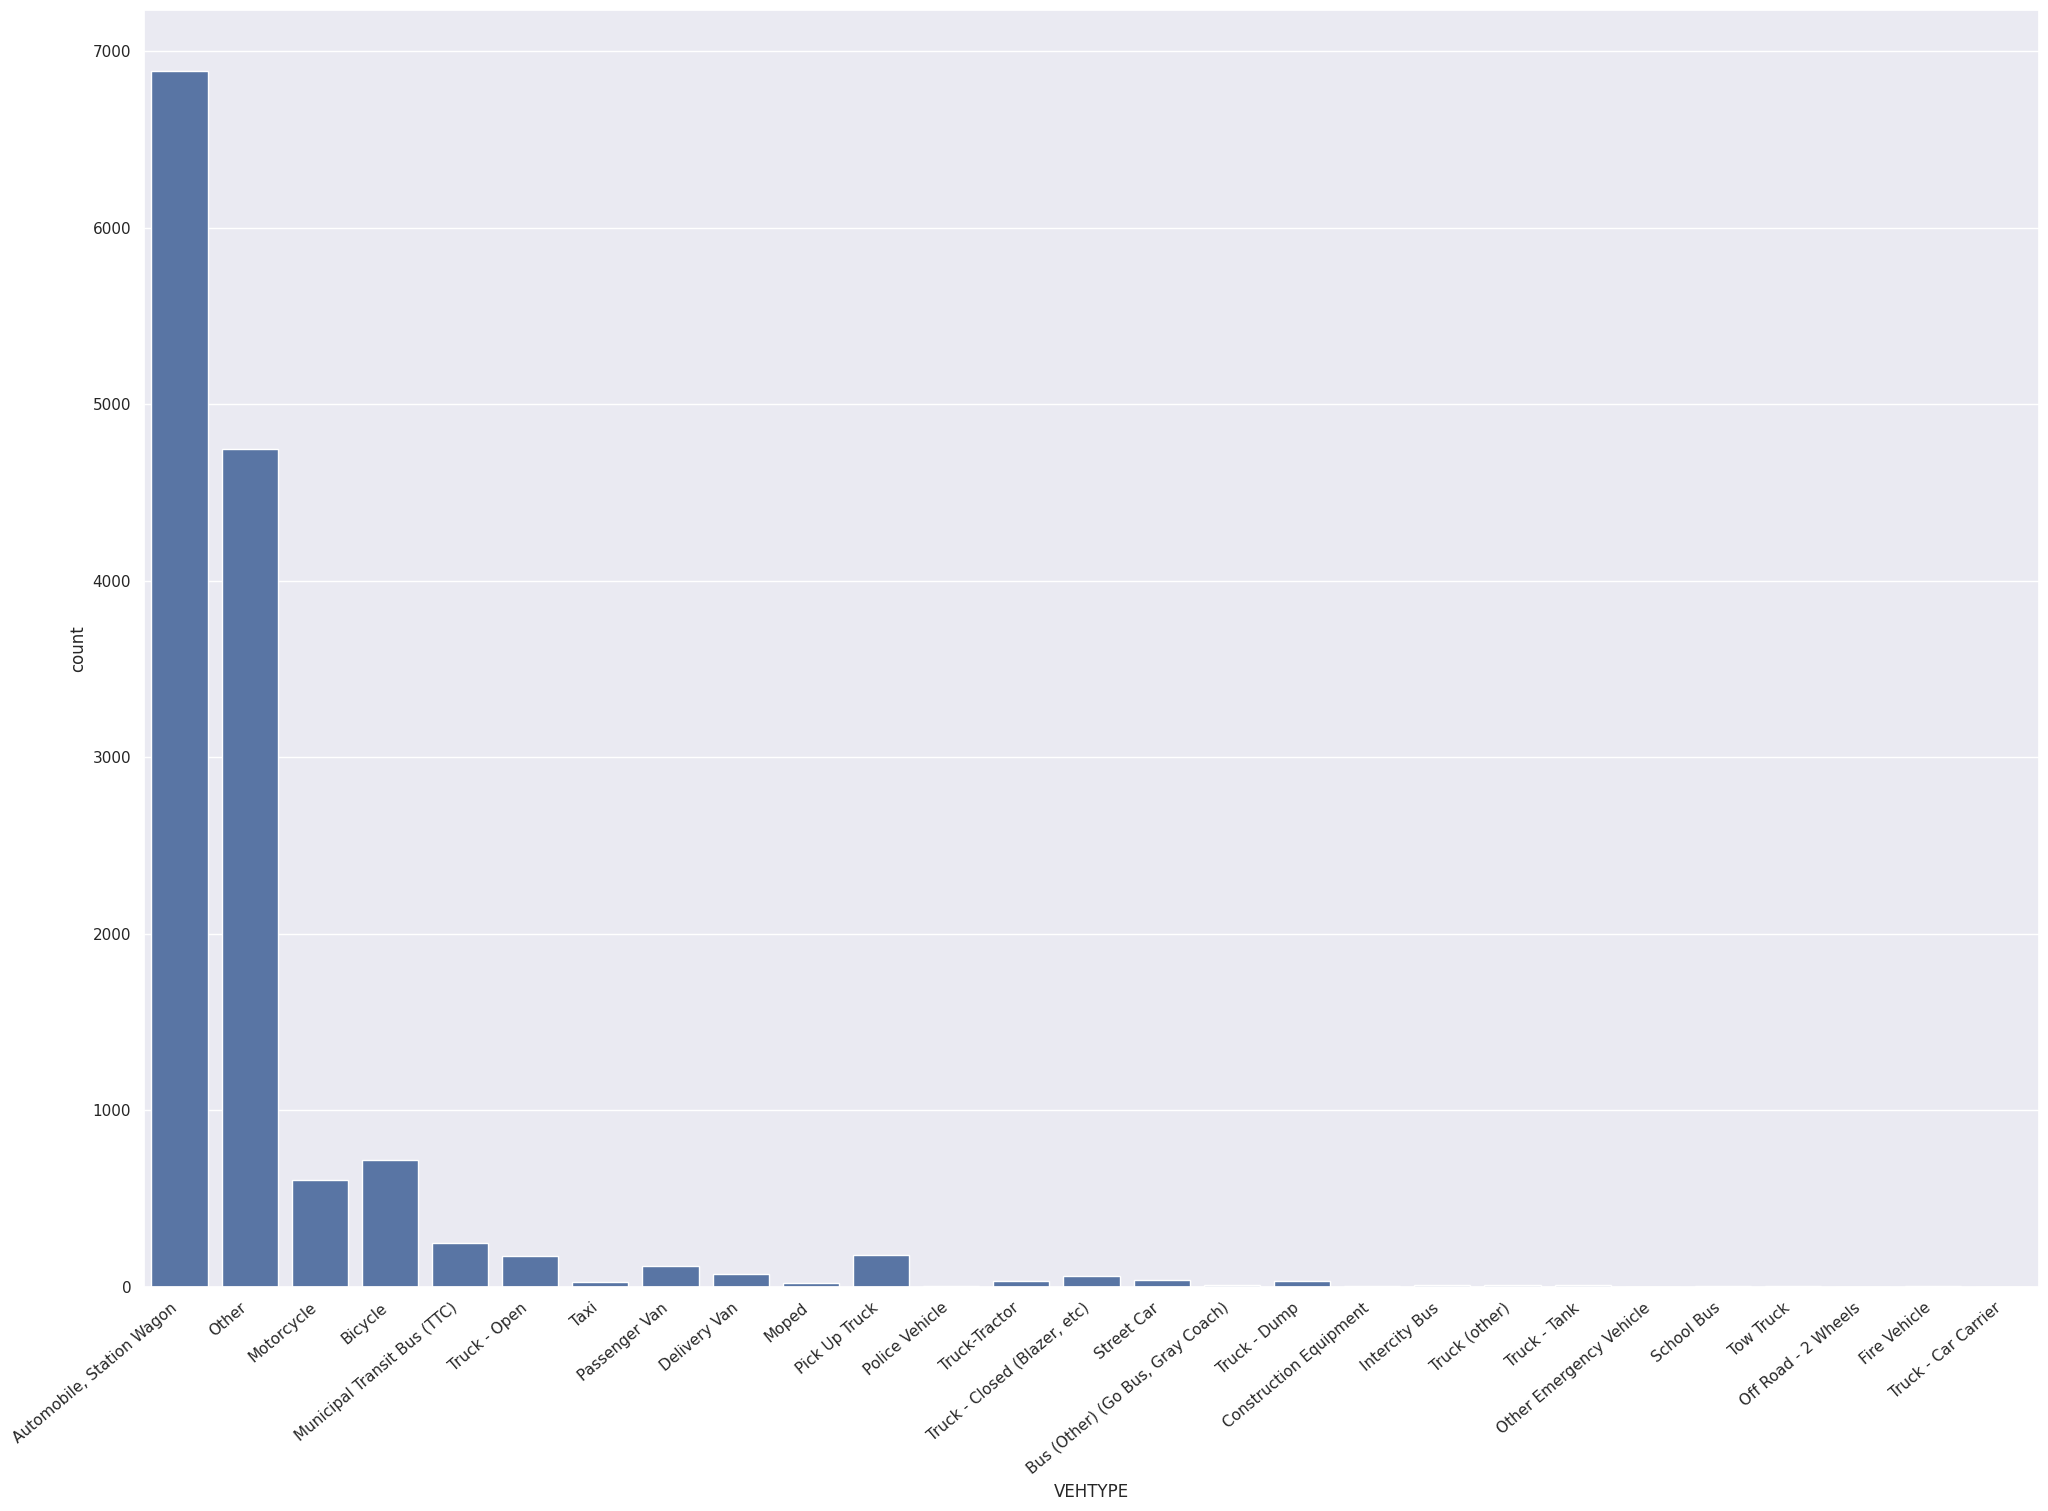

In [17]:
ax = sns.countplot(x = 'VEHTYPE', data = df_minor)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-18-64efb01b8643>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


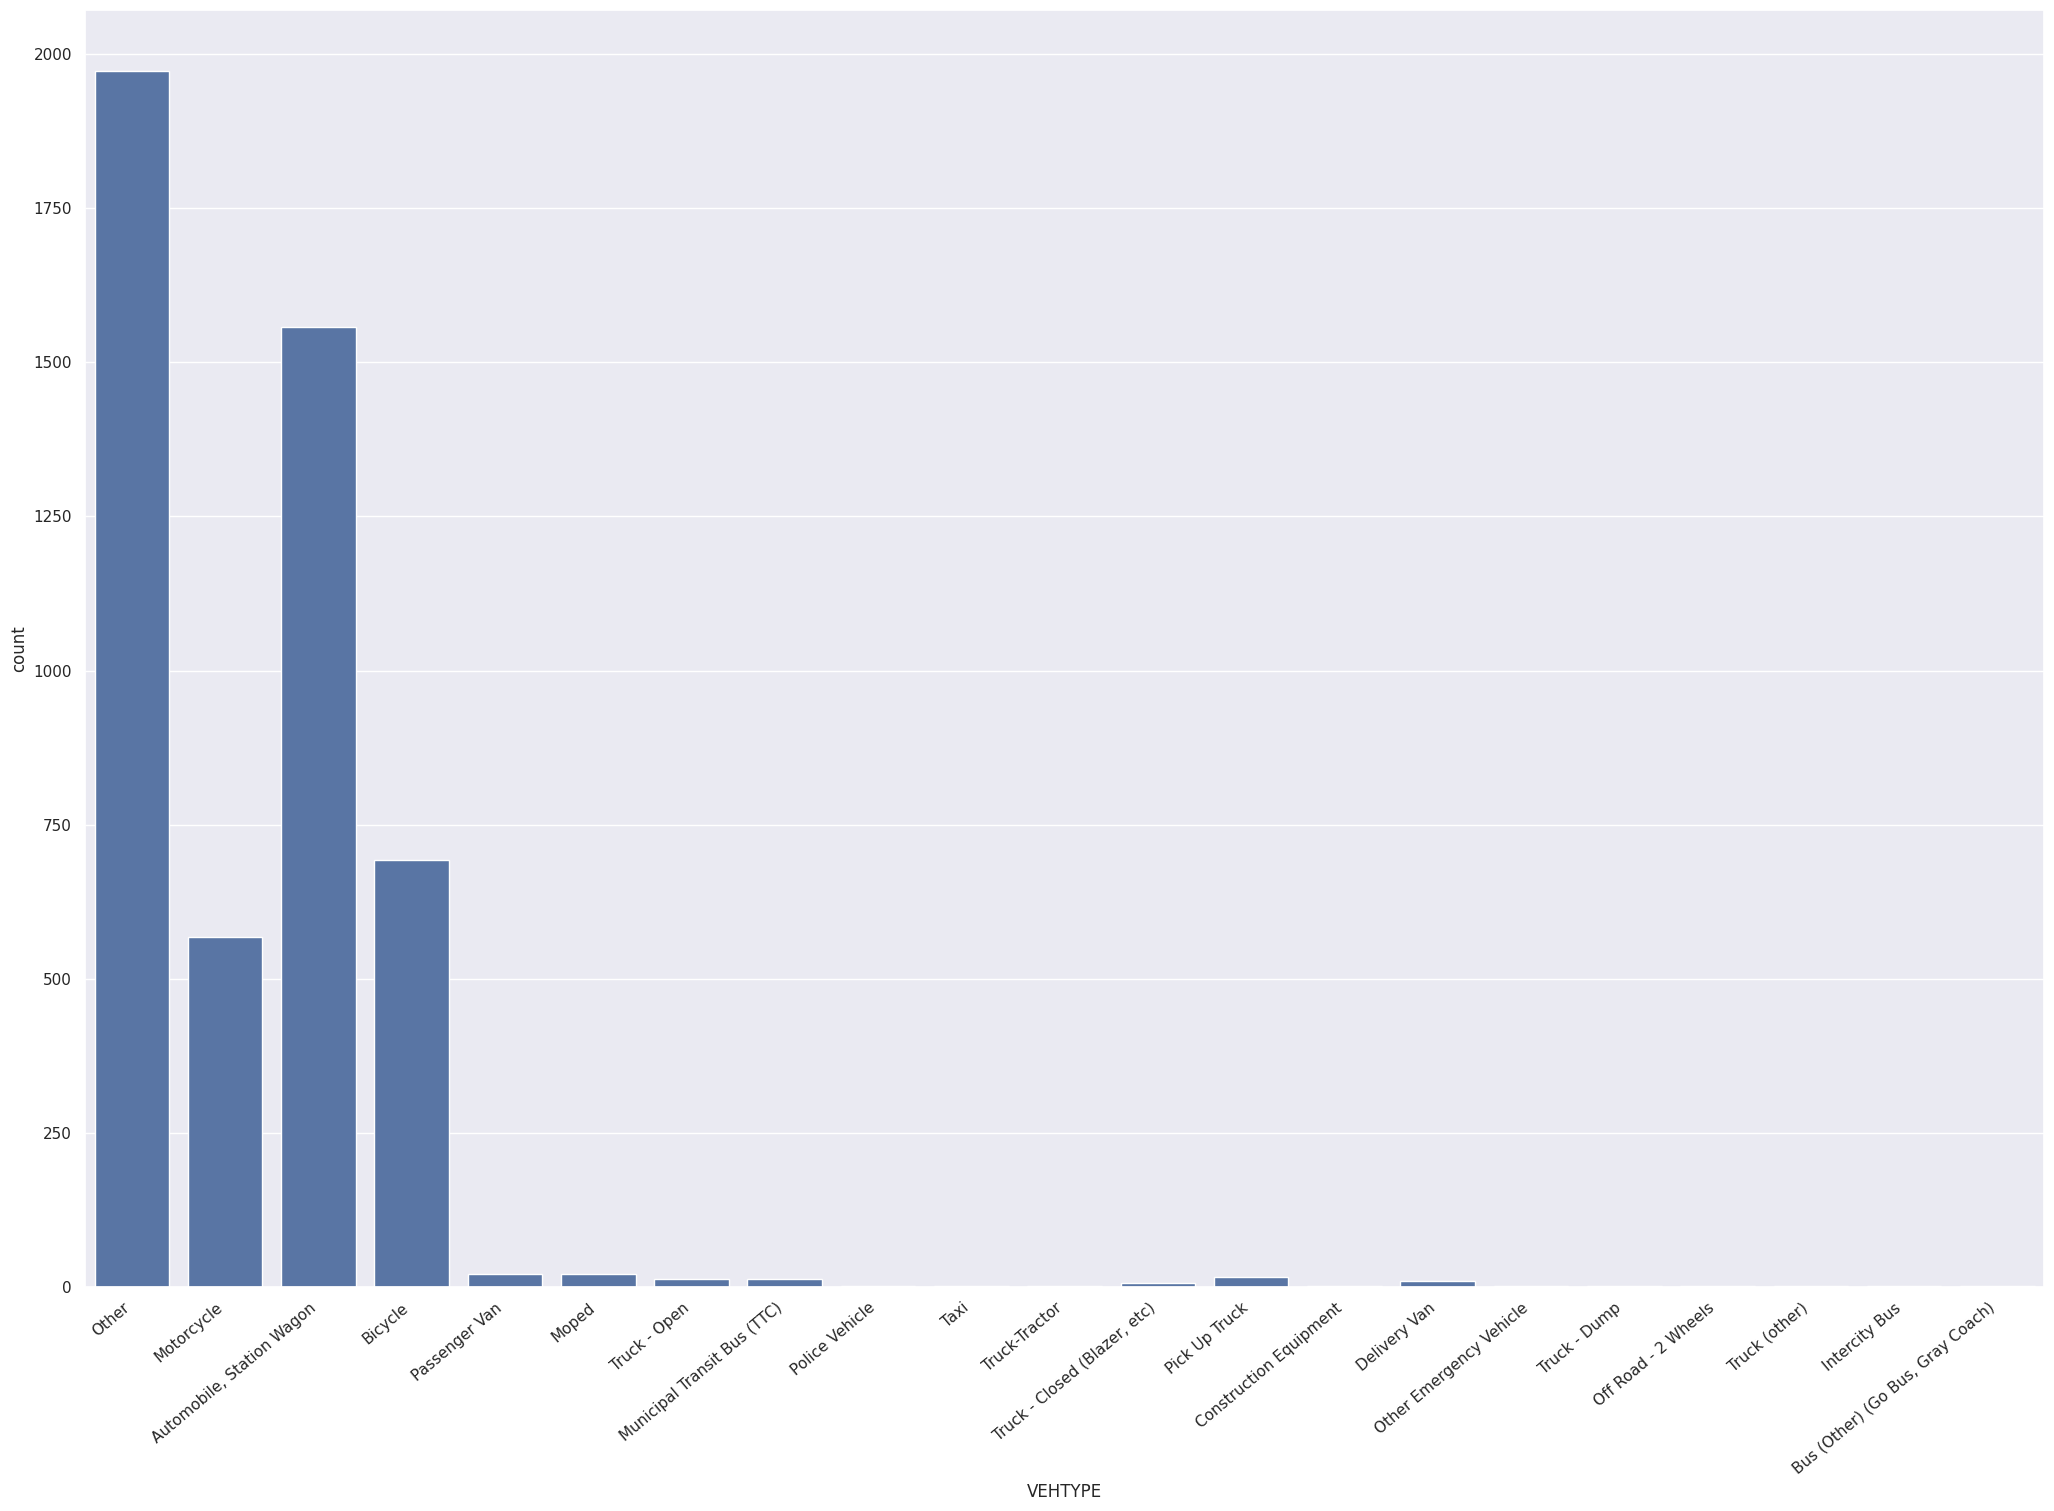

In [18]:
ax = sns.countplot(x = 'VEHTYPE', data = df_serious)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

After comparing the vehicle types we found that with serious accidents, a greater proportion involves bicycles and motorcycles.



Considering the data collected up until this point we can say that we have a general understanding of what has caused these crashes, however, it may be interesting to look at the age demographic behind these collisions. For our fifth feature, the team took a look at the involvement age for minor and major injury collisions.


<ipython-input-19-6f420c2985cf>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


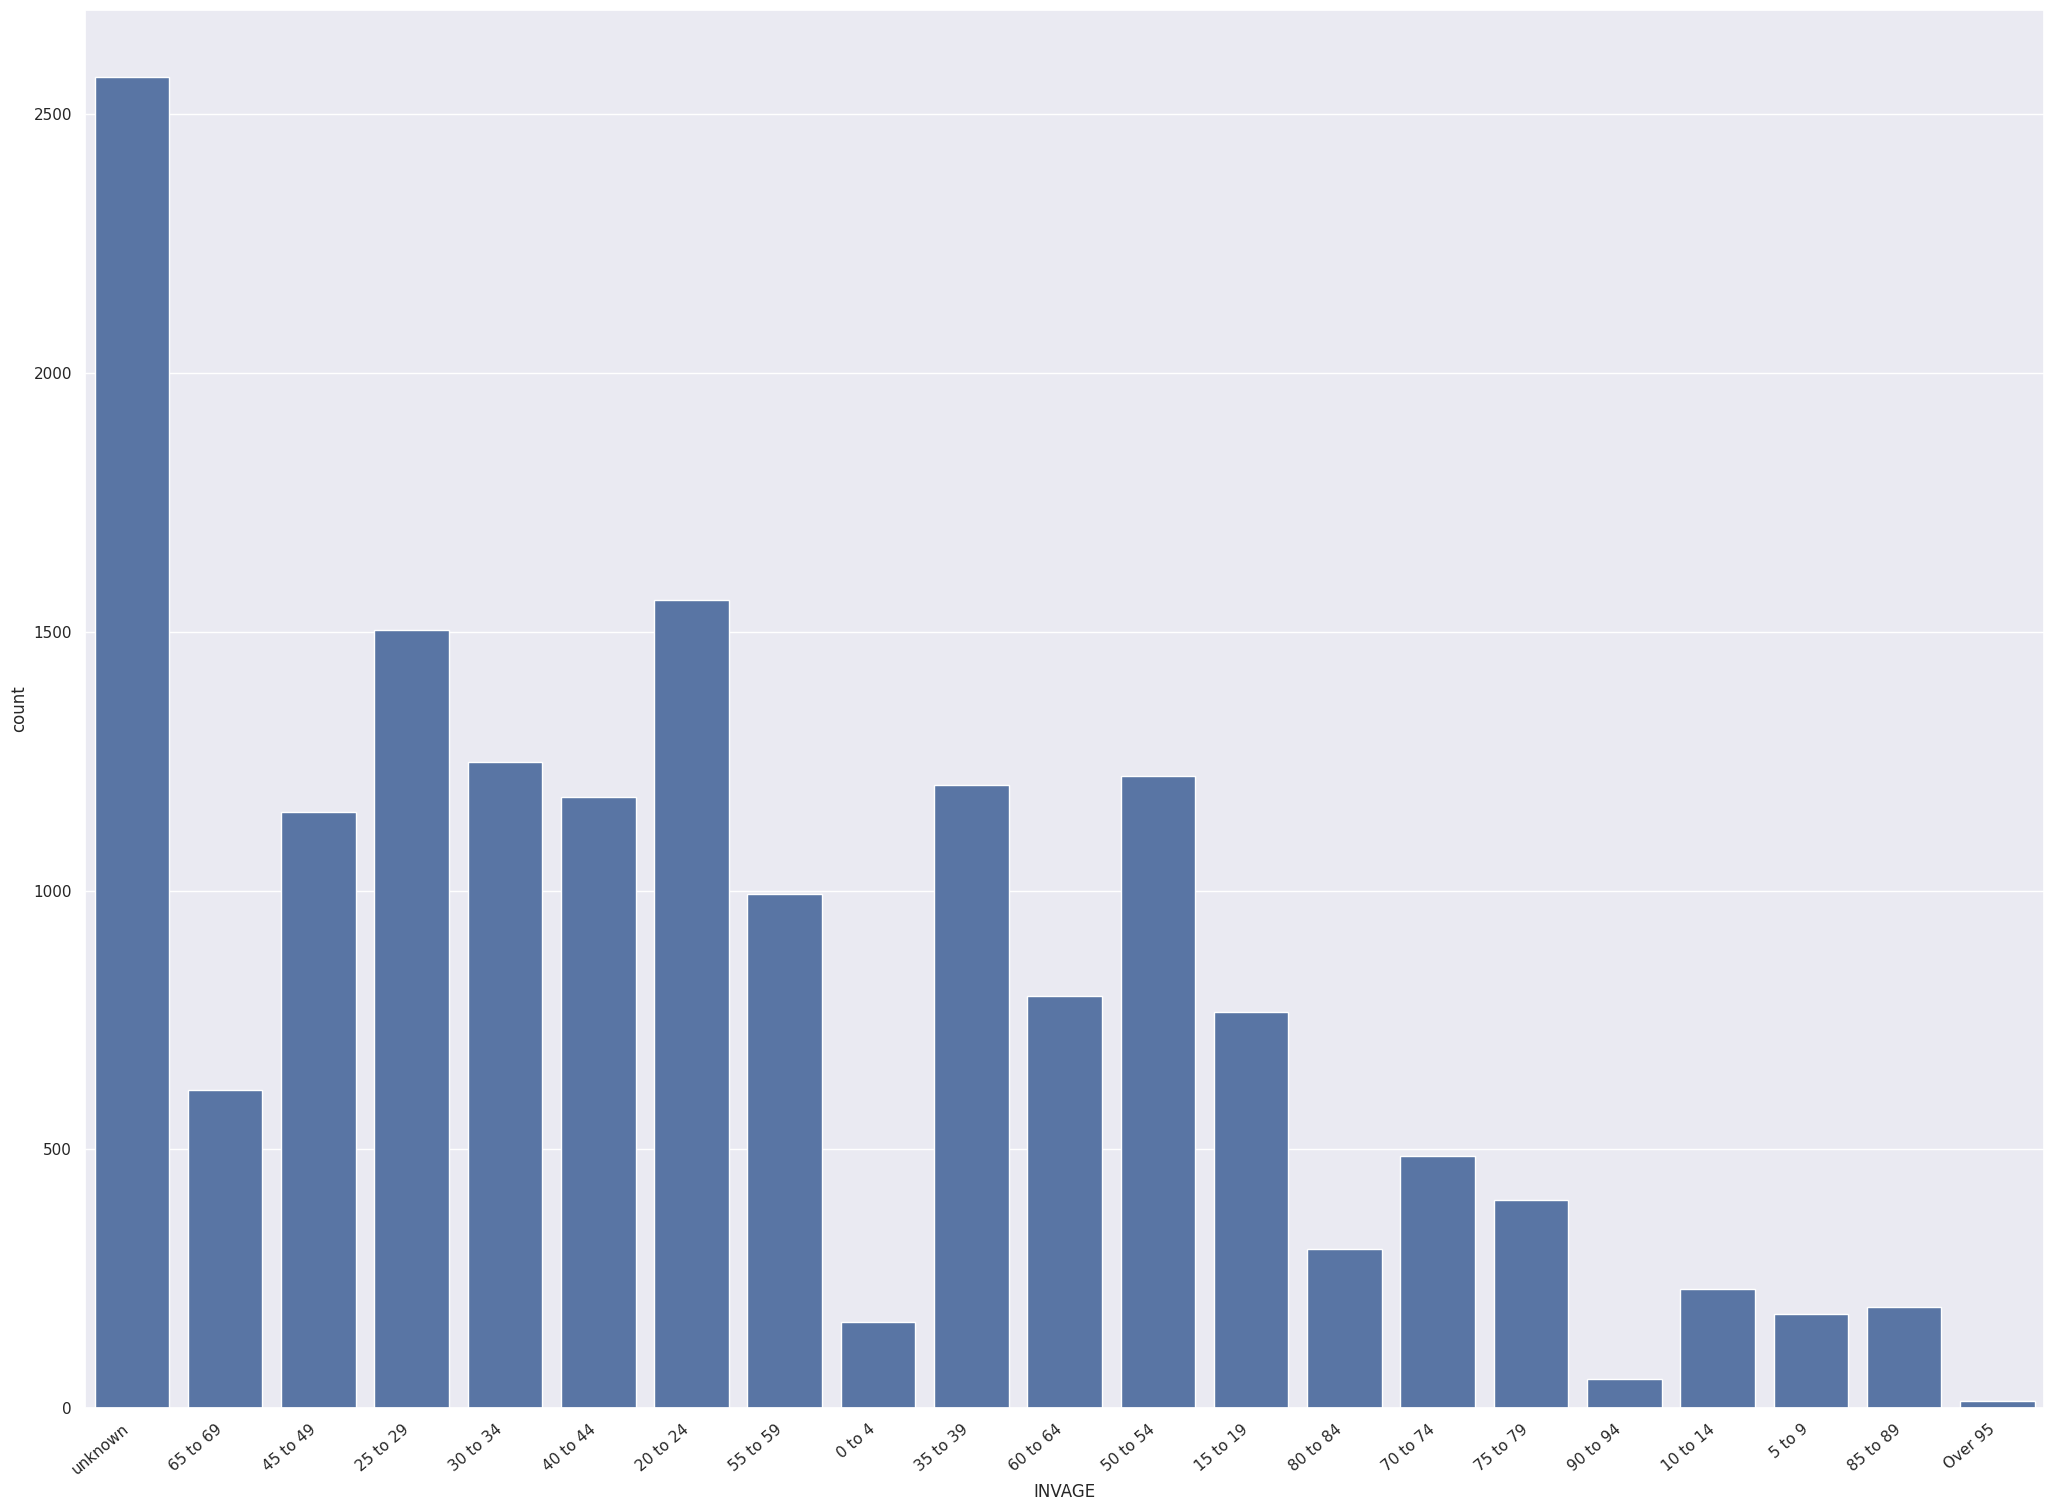

In [19]:
ax = sns.countplot(x = 'INVAGE', data = df_minor)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-20-3e7c2464a2f9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


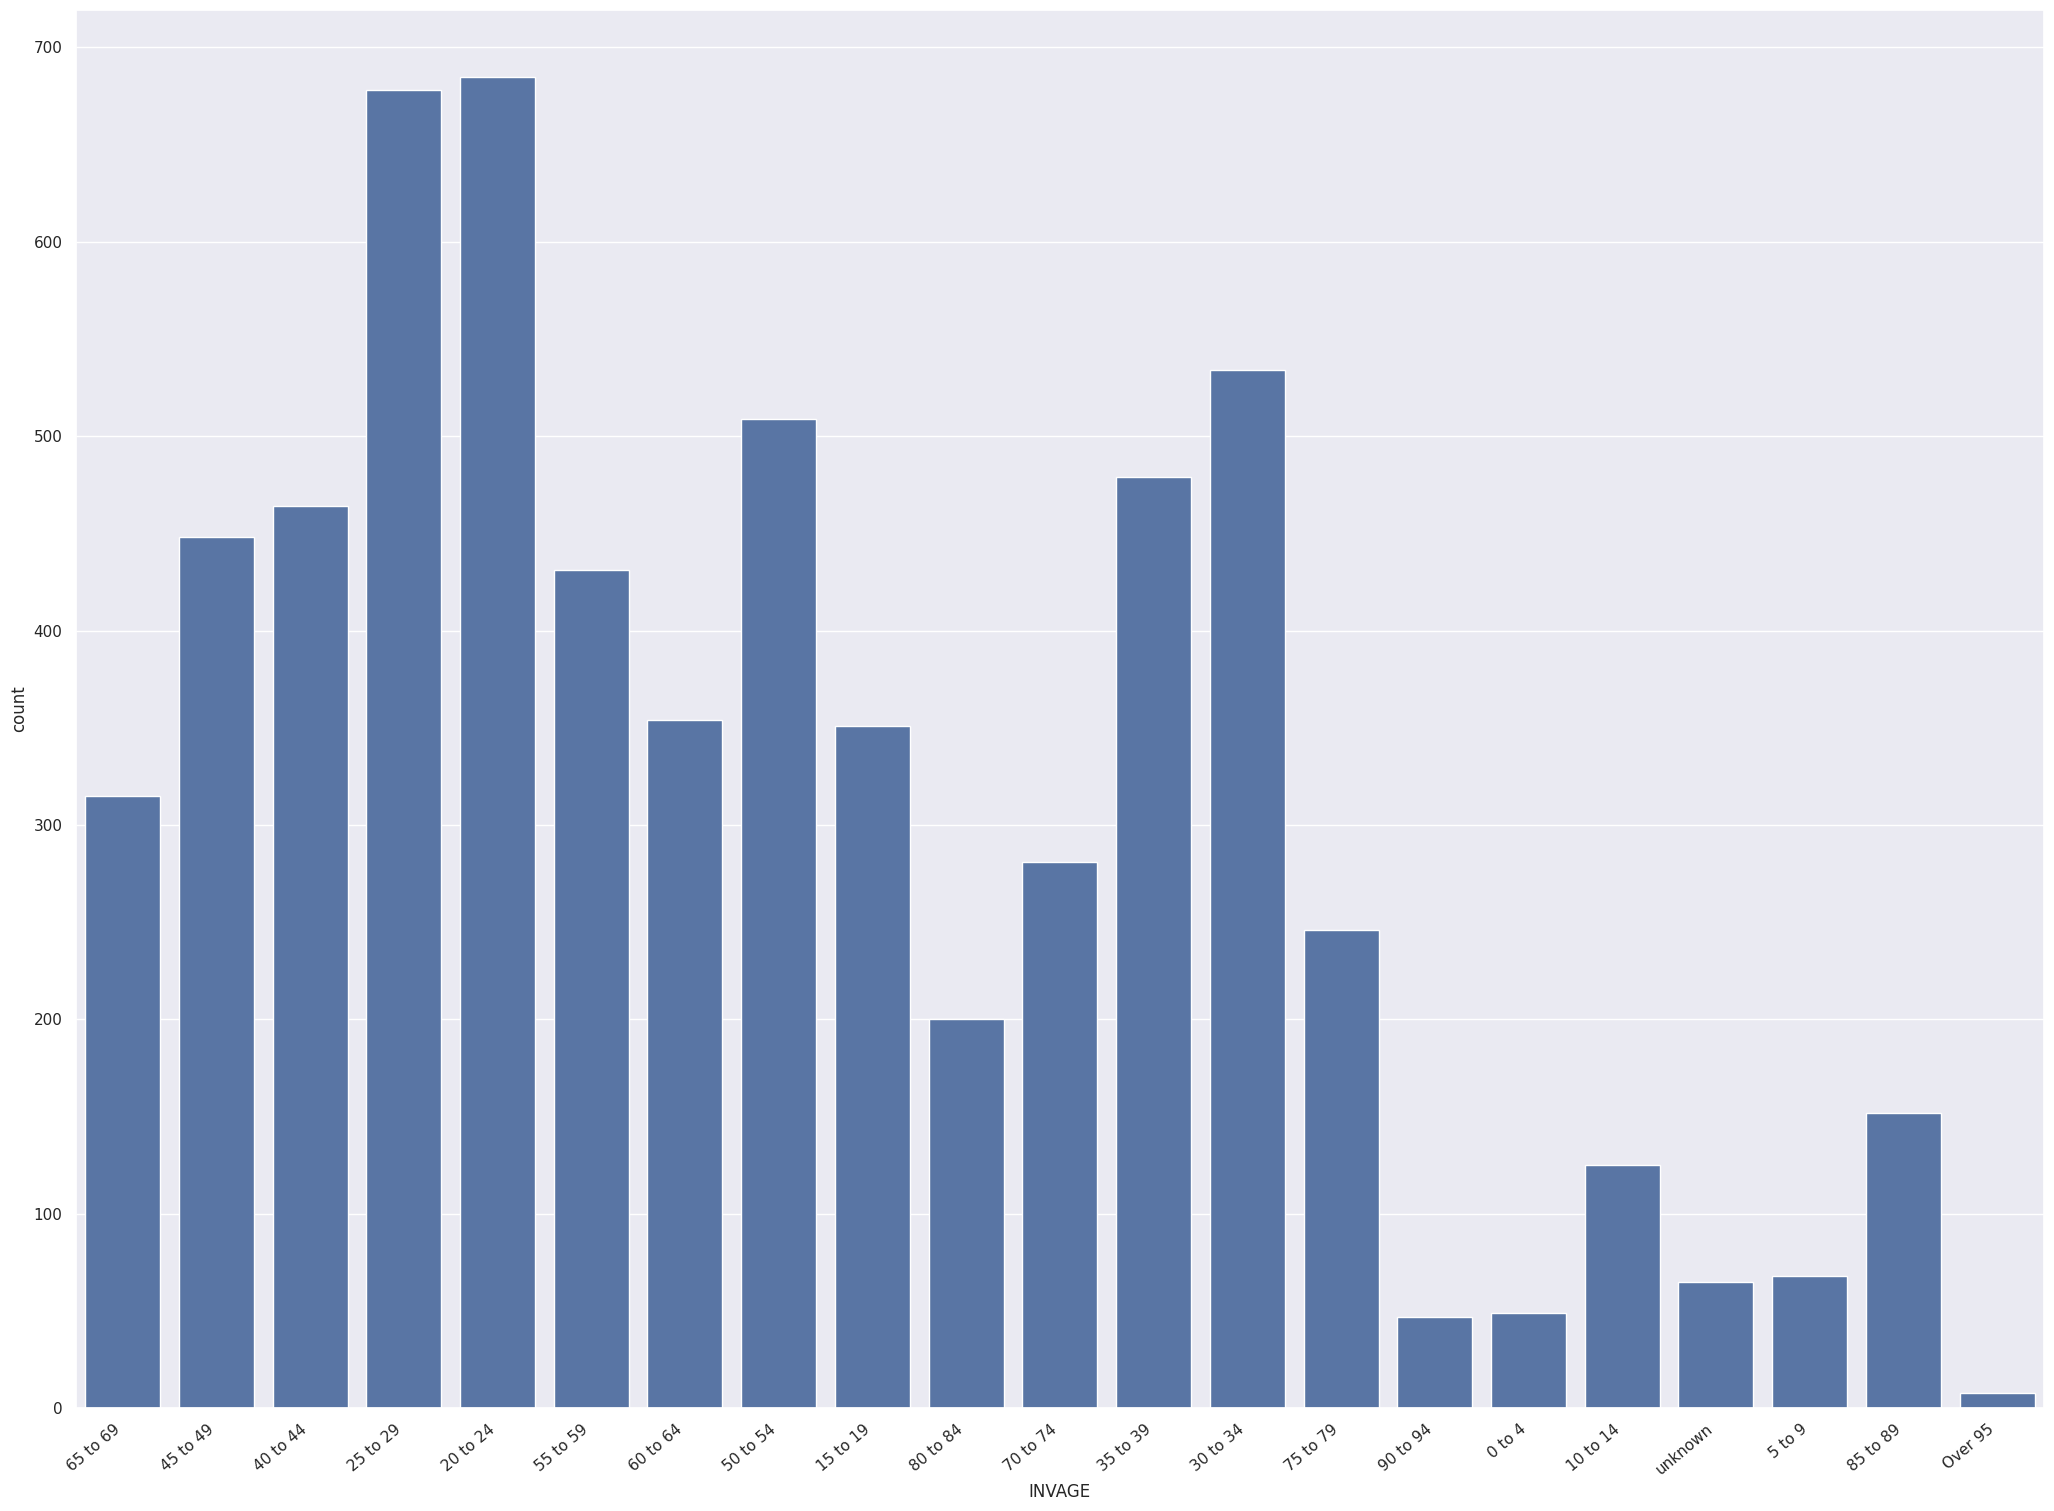

In [20]:
ax = sns.countplot(x = 'INVAGE', data = df_serious)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

Sequentially, for the sixth feature the team looked to identify the ‘involved party’ demographic, that was generally involved in the vehicle collision.

<ipython-input-21-3193d1fa9209>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


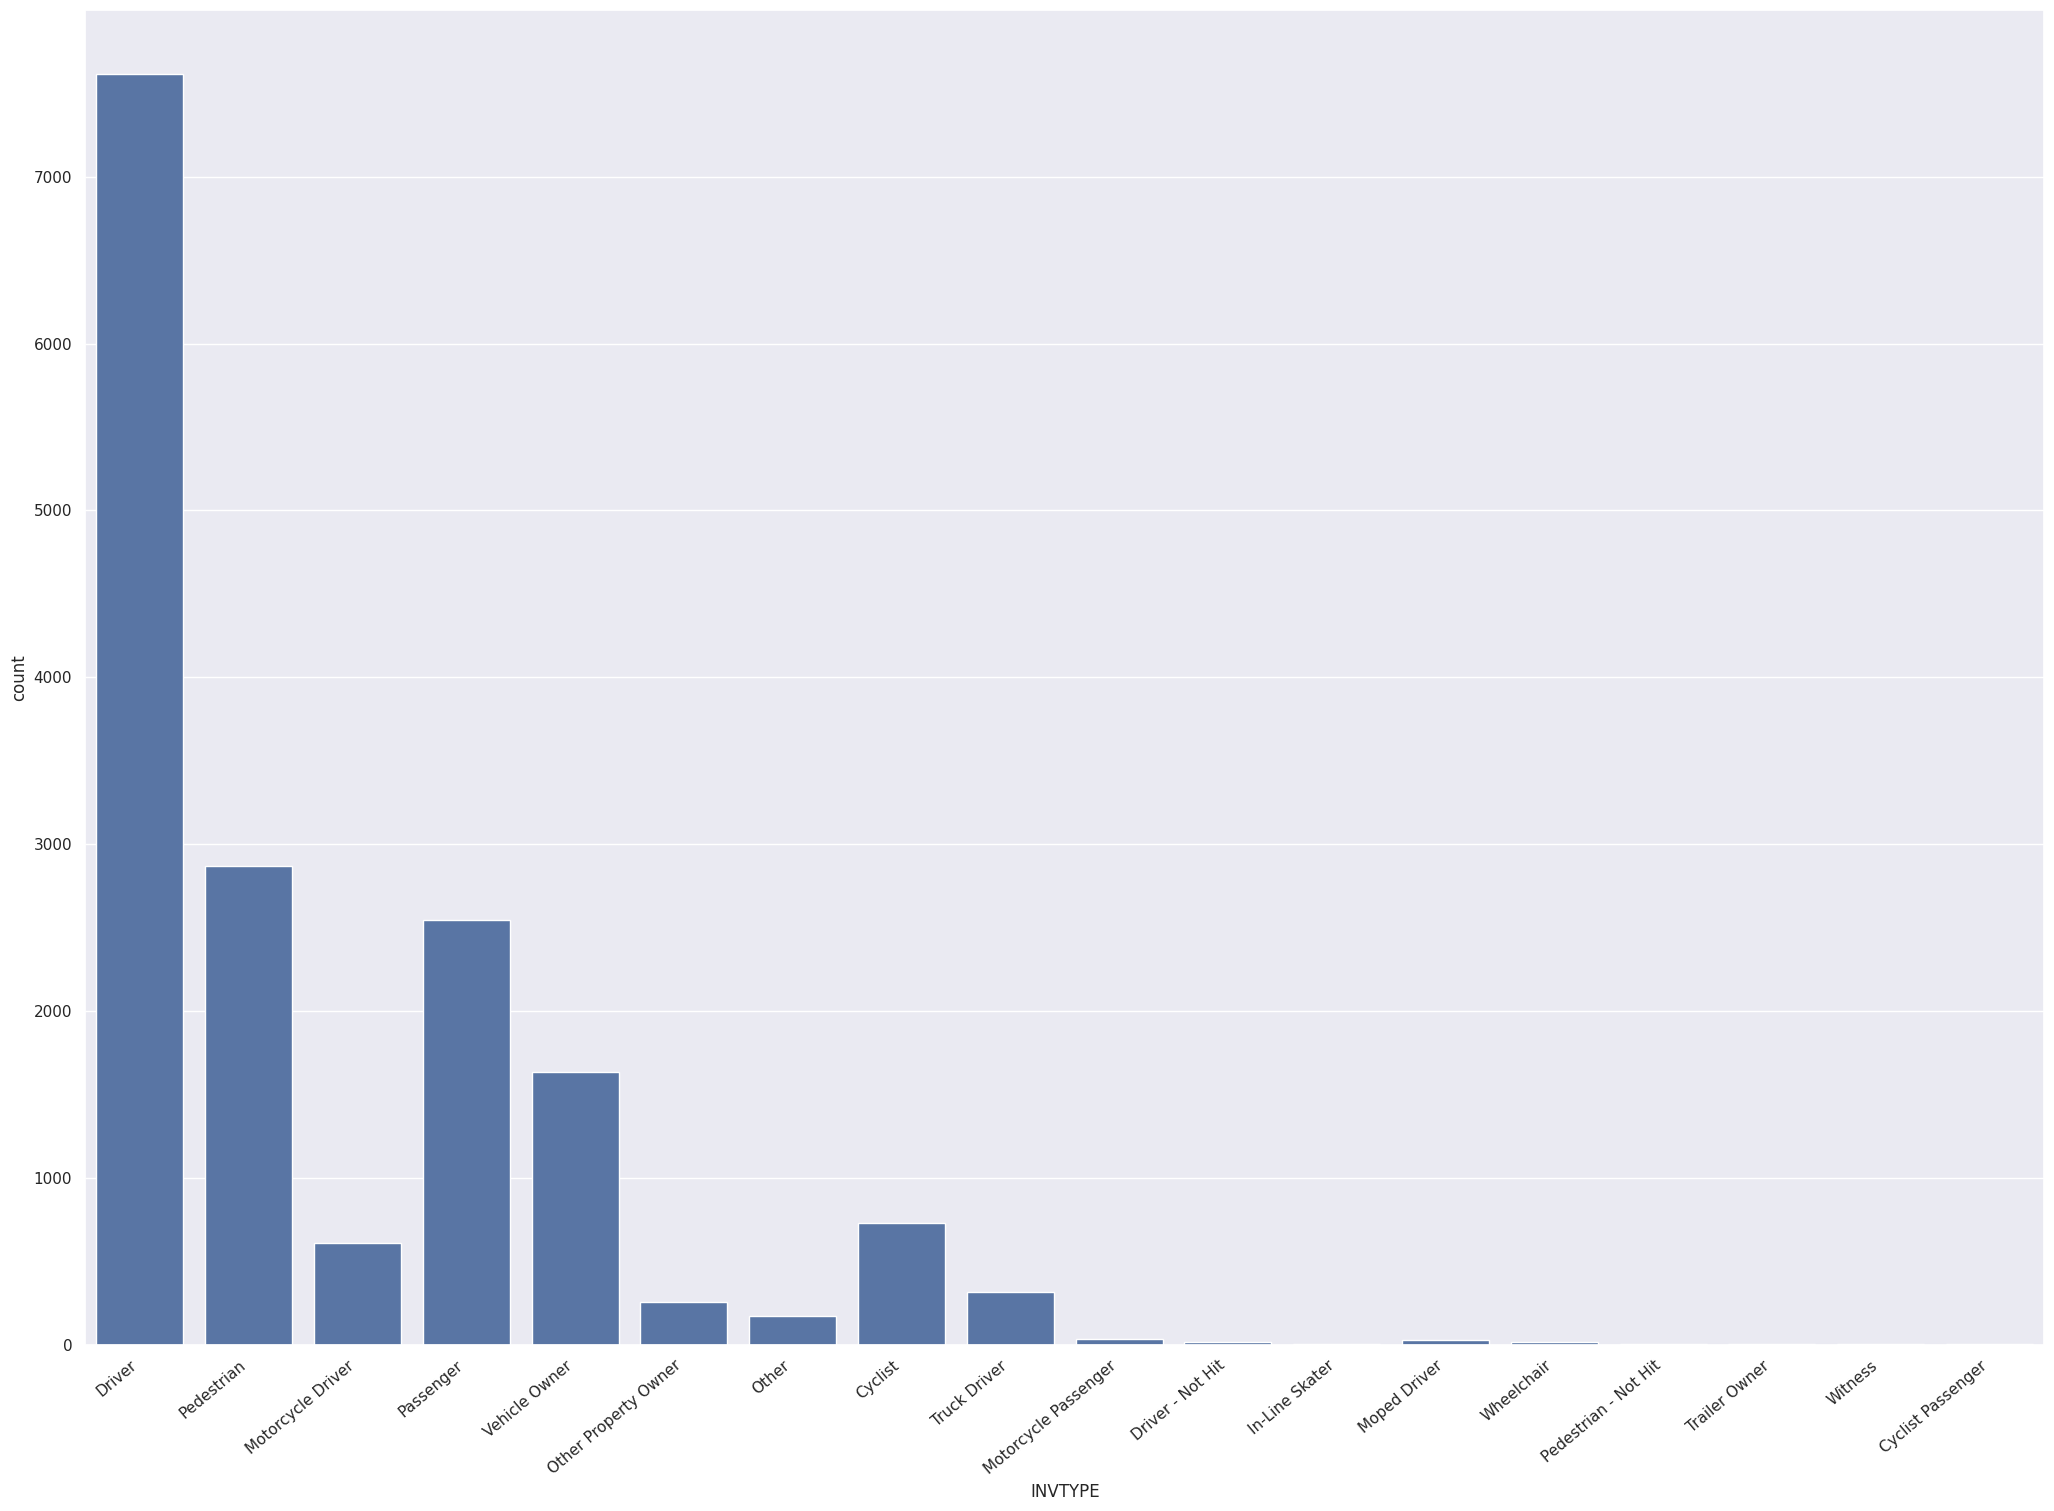

In [21]:
ax = sns.countplot(x = 'INVTYPE', data = df_minor)
sns.set(rc={'figure.figsize':(25.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-22-3f18d5b29690>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap


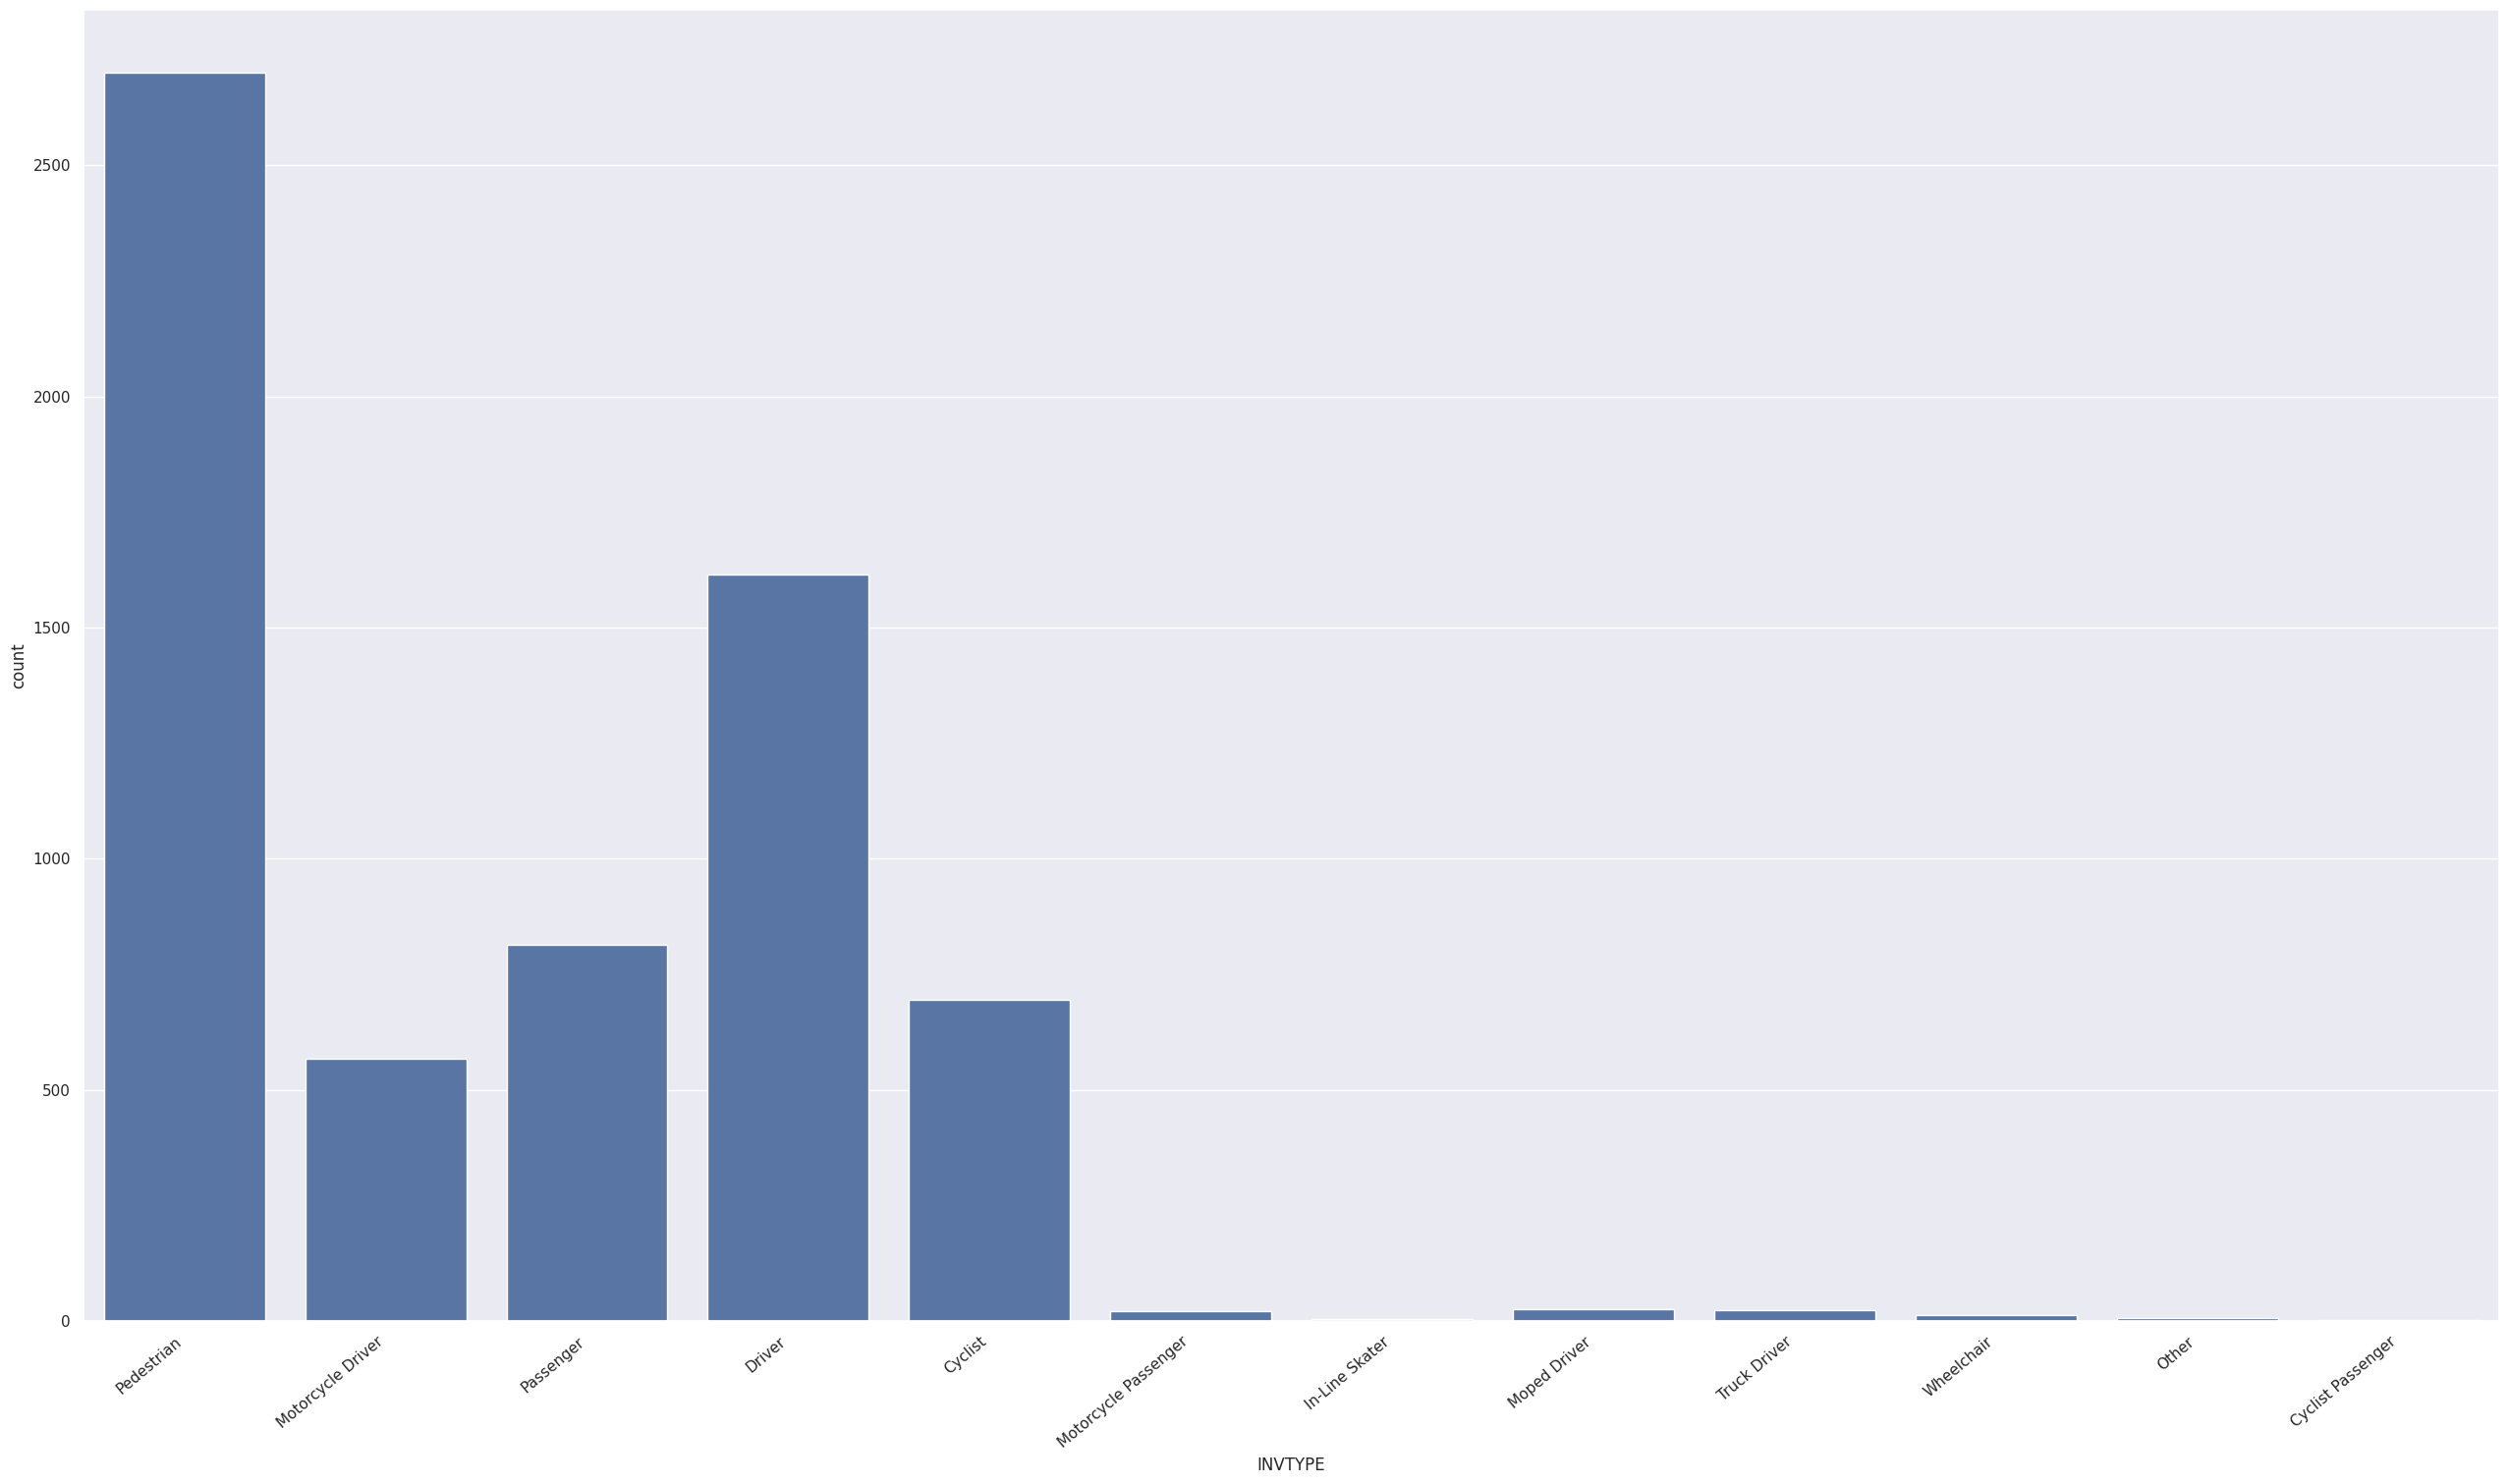

In [22]:
ax = sns.countplot(x = 'INVTYPE', data = df_serious)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotating labels to avoid overlap
plt.tight_layout()
plt.show()

After taking a look at the involvement type it can be seen that many major injury collisions overwhelmingly involve pedestrians. (This makes sense given the lack of security and exposure pedestrians face during collisions.

## Final List of Features

When concatenating the results of the features above the team came together to identify the five appropriate features on which to base the model. These features include Driver Action, Driver Condition, Vehicle Type, Involvement Age, and Involvement Type.


##Cleaning the dataset

When exploring the null values, in the dataset we can see that we have a substantial amount of null values - but it is important to note that some of these values make sense.

Examples:
- Not all collisions require a street 2
- PEDACT/PEDTYPE is only populated for accidents with a pedestrian involved - same with aspects such as disability, alcohol, redlight (these are binary) and are only populated if 'TRUE'

Given the features we defined for our model - it would be best to remove rows which have null values for the features (as the categorical variables should be populated)

In [23]:
#observing null values in the dataset
print(df.isnull().sum())

_id                    0
ACCNUM                 0
YEAR                   0
DATE                   0
TIME                   0
HOUR                   0
STREET1                0
STREET2             1510
OFFSET             14114
ROAD_CLASS           497
DISTRICT             141
WARDNUM              196
DIVISION             196
LOCCOORD             105
ACCLOC              5450
TRAFFCTL              29
VISIBILITY            18
LIGHT                  0
RDSFCOND              23
ACCLASS                0
IMPACTYPE              4
INVTYPE               12
INVAGE                 0
INJURY              1612
FATAL_NO           16147
INITDIR             4894
VEHTYPE             2813
MANOEUVER           7233
DRIVACT             8398
DRIVCOND            8396
PEDTYPE            14074
PEDACT             14081
PEDCOND            14025
CYCLISTYPE         16160
CYCACT             16153
CYCCOND            16154
PEDESTRIAN         10033
CYCLIST            15081
AUTOMOBILE          1552
MOTORCYCLE         15476


In [24]:
#defining the features we will use initially
features = ['DRIVACT', 'INVAGE', 'VEHTYPE', 'DRIVCOND', 'INVTYPE']

In [25]:
df.dropna(subset=features)

,_id,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,geometry
0,1,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),1,"{u'type': u'Point', u'coordinates': (-79.45249..."
2,3,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,"{u'type': u'Point', u'coordinates': (-79.19978..."
3,4,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),4,"{u'type': u'Point', u'coordinates': (-79.19978..."
4,5,892682,2006,2006-03-12T00:00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,...,NaN,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),5,"{u'type': u'Point', u'coordinates': (-79.25619..."
7,8,892913,2006,2006-03-12T00:00:00,1903,19,OSSINGTON AVE,DUNDAS ST W,NaN,Major Arterial,...,NaN,Yes,NaN,Yes,NaN,D14,81,Trinity-Bellwoods (81),8,"{u'type': u'Point', u'coordinates': (-79.42079..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16853,16854,1630486,2020,2020-08-29T00:00:00,1419,14,YONGE ST,FLORENCE AV,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D32,51,Willowdale East (51),16854,"{u'type': u'Point', u'coordinates': (-79.41008..."
16854,16855,1636966,2020,2020-08-30T00:00:00,1340,13,BRIMLEY RD,BARKDENE HILLS,50 m South of,NaN,...,NaN,Yes,NaN,NaN,NaN,D41,123,Cliffcrest (123),16855,"{u'type': u'Point', u'coordinates': (-79.23892..."
16856,16857,1650701,2020,2020-09-01T00:00:00,1205,12,EGLINTON AVE E,BELLAMY RD N,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D43,138,Eglinton East (138),16857,"{u'type': u'Point', u'coordinates': (-79.23202..."
16857,16858,1650701,2020,2020-09-01T00:00:00,1205,12,EGLINTON AVE E,BELLAMY RD N,NaN,Major Arterial,...,NaN,Yes,NaN,NaN,NaN,D43,138,Eglinton East (138),16858,"{u'type': u'Point', u'coordinates': (-79.23202..."


We can define our tagret as a binary variable: 1 - if a major or fatal injury, 0 otherwise. Eluding to our business problem we would like to predict serious injuries thus major/fatal can be grouped together - this alao makes it easier to work with a logistic regression model (more on this later)

In [26]:

# the target feature can be defined for our model (1) if a major or fatal injury
# occurs, (0) otherwise

df['target'] = np.where((df['INJURY'] == "Major") | (df['INJURY'] == "Fatal"),1,0)
df.head()


,_id,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,geometry,target
0,1,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,Yes,NaN,NaN,NaN,D11,88,High Park North (88),1,"{u'type': u'Point', u'coordinates': (-79.45249...",0
1,2,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,Yes,NaN,NaN,NaN,D11,88,High Park North (88),2,"{u'type': u'Point', u'coordinates': (-79.45249...",1
2,3,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,"{u'type': u'Point', u'coordinates': (-79.19978...",1
3,4,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,Yes,Yes,NaN,NaN,D42,131,Rouge (131),4,"{u'type': u'Point', u'coordinates': (-79.19978...",0
4,5,892682,2006,2006-03-12T00:00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,...,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),5,"{u'type': u'Point', u'coordinates': (-79.25619...",0


# Supervised Model

Given that we are working with categorical variables - our features have to be encoded prior to working with the sklearn library and creating a decision tree.

We will also experiment with a logistic regression given our target has been set to either 0/1.

Our first set of features expressed corellations between more serious and less serious accidents. Specifically, these features seem to provide a clear distinction in predicting accident severity as opposed to simply prediticting proabability of any collision.


### Decision Tree Exp 1

In [27]:
#importing necessary libraries for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
#an instance of the decision tree classifier
# min number of samples are set to 100 to avoid overfitting and limit iteration
a = DecisionTreeClassifier(min_samples_split=100)


#in order to work with our categorical variables we will encode them
encoded_features = pd.get_dummies(df[features], drop_first=True)
#get dummies creates dummy features for our categorical features by encoding
#each option to a distinct number

#drop_first is set to true to deal with multicollinearity issues

In [29]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(encoded_features, # X - features
                                                    df.target, # y - target
                                                    test_size=0.2,
                                                    random_state = 42)

In [30]:
# use the training set to train the model
a.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [31]:
# predict target of testing set
y_pred = a.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

# get the accurancy
accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ", accuracy*100 )

Accuracy using Decision Tree:  85.40925266903915


Our first iteration of the decison tree provides an 85.1% accuracy with a 80/20 split between the training and testing.

A next step is to optomize this decision tree using various paramters at our disposal.

### Decision Tree Exp 2 - Parameter Optimization
By tweaking our optimization paramters the accuracy for our tree should increase.

In [33]:
# criterion is changed from default to entropy
# depth is initially set to 5
a_opt = DecisionTreeClassifier(min_samples_split=100,
                             criterion='entropy',
                             max_depth=5)

# train the model
a_opt.fit(X_train,y_train)

# predict the values of the testing
opt_pred = a_opt.predict(X_test)

# get the accurancy
opt_accuracy  = accuracy_score(y_test,opt_pred)

print("Accuracy with parameter tuning: ", opt_accuracy*100 )

Accuracy with parameter tuning:  85.11269276393831


We see a slight uptick in accuracy to 85.4% by adjusting our optimization paramters - depth of '5' leads to greatest
accuracy.



### Logistic Regression - Experiment

Another algorthim to expriment with - logistic regressions can be leveraged for binary outputs (in this case our target is set to binary 1 - fatal/major, 0 - other)

Given the performance of our decison tree we have fair confidence in our initially selected feature set and it's ability to produce an accurate model

Again we will initally consider our encoded features (multicollinearity has already been considered)

Our Target has to be set to a 1-d array

In [34]:
#target class for logistic regression - predefined target class
y_logreg = df.target
y_logreg = np.ravel(y_logreg)

y_logreg #confirming our conversion

array([0, 1, 1, ..., 0, 1, 0])

In [35]:
#Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [36]:
#Creating a logistic model using sci-kit-learn
# Spliting data
X_train, X_test, Y_train, Y_test = train_test_split(encoded_features,y_logreg,
                                                    test_size = 0.2)

lmodel = LogisticRegression() #instance of logistic regression model

# Now fit the new model
lmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Predict the classes of the testing data set
class_predict = lmodel.predict(X_test)


# Compare the predicted classes to the actual test classes
logreg_accuracy = accuracy_score(Y_test,class_predict)
logreg_accuracy

0.8514234875444839

Now lets compare this to our rate of major/fatal injuries from the dataset

In [38]:
y_logreg.mean()

0.38487544483985764

If the logistic regression model had predicted all to be non-serious the accuracy would be 1-0.38 = 62% - accuracy level

That means our model has done a subtantially better job at predicting the seriousness of the injury! (23% higher accuracy at 85%)

Lets take a look at how some of our features performed and what possible other features could be leveraged.

As mentioned earlier a lot of the columns in our datset are correlated with one another - thus some columns act as a direct incorporation or good proxy for other columns. For example DRIVCOND -(Driver Condition describes the state of the driver) - this already incorporates the binary variables ALCOHOL and disability.

Thus we will experiment by incorporating some other features which are not correlated and may act as a good distinction for serious/less-serious injuries.

- RDSFCOND - road surface conditions (harsher conditions could lead a greater lack of control)
- IMPACTYPE - Impacttype

(Again we are limited from adding additional features given correlated nature of columns in dataset)

In [39]:
df2 = pd.read_csv('collisions.csv') #new instance of dataset
features2 = ['DRIVACT', 'INVAGE', 'VEHTYPE', 'DRIVCOND', 'INVTYPE', 'RDSFCOND',
             'IMPACTYPE'] #new set of features

df2.dropna(subset=features2) #applying same cleaning methdology
df2['target'] = np.where((df2['INJURY'] == "Major") | (df2['INJURY'] == "Fatal"),1,0)

df2.head()


<ipython-input-39-66c0024a0043>:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('collisions.csv') #new instance of dataset


,_id,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,geometry,target
0,1,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,Yes,NaN,NaN,NaN,D11,88,High Park North (88),1,"{u'type': u'Point', u'coordinates': (-79.45249...",0
1,2,892658,2006,2006-03-11T00:00:00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,...,Yes,NaN,NaN,NaN,D11,88,High Park North (88),2,"{u'type': u'Point', u'coordinates': (-79.45249...",1
2,3,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,"{u'type': u'Point', u'coordinates': (-79.19978...",1
3,4,892810,2006,2006-03-11T00:00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,...,Yes,Yes,NaN,NaN,D42,131,Rouge (131),4,"{u'type': u'Point', u'coordinates': (-79.19978...",0
4,5,892682,2006,2006-03-12T00:00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,...,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),5,"{u'type': u'Point', u'coordinates': (-79.25619...",0


### Decision tree experiment - Additional features

In [40]:
b = DecisionTreeClassifier(min_samples_split=100)

#in order to work with our categorical variables we will encode them
encoded_features2 = pd.get_dummies(df2[features2], drop_first=True)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(encoded_features2, # X - features
                                                    df2.target, # y - target
                                                    test_size=0.2,
                                                    random_state = 42)


# use the training set to train the model
b.fit(X_train,y_train)

# predict target of testing set
y_pred = b.predict(X_test)

# get the accurancy
accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ", accuracy*100 )

Accuracy using Decision Tree:  86.29893238434164


We see a greater accuracy with these additional features! - 86%, lets also try and optimize this tree

In [41]:

# depth is initially set to 5
b_opt = DecisionTreeClassifier(min_samples_split=100,
                             criterion='gini',
                             max_depth=8)

# train the model
b_opt.fit(X_train,y_train)

# predict the values of the testing
opt_pred = b_opt.predict(X_test)

# get the accurancy
opt_accuracy  = accuracy_score(y_test,opt_pred)

print("Accuracy with parameter tuning: ", opt_accuracy*100 )

Accuracy with parameter tuning:  86.23962040332147


Our tree still hovers at 86% after playing with paramters as compared to 85% in our orginal model - suggesting that the added features do not provide a greater dimension for predection or we may have reached the peak in terms of our ability to accuratley predict serious collisions.

## Final Model - Boosted Decision Tree

Decision trees are inherintly very prone to overfitting, ensemble learning methods such as boosting can control this overfitting and help the model generalize to new data better.

In [42]:
import xgboost as xgb
# import library for xgboost classifier

boosted_model = xgb.XGBClassifier()

boosted_model.fit(X_train, y_train) # fit model on training data

y_pred_bm = boosted_model.predict(X_test)



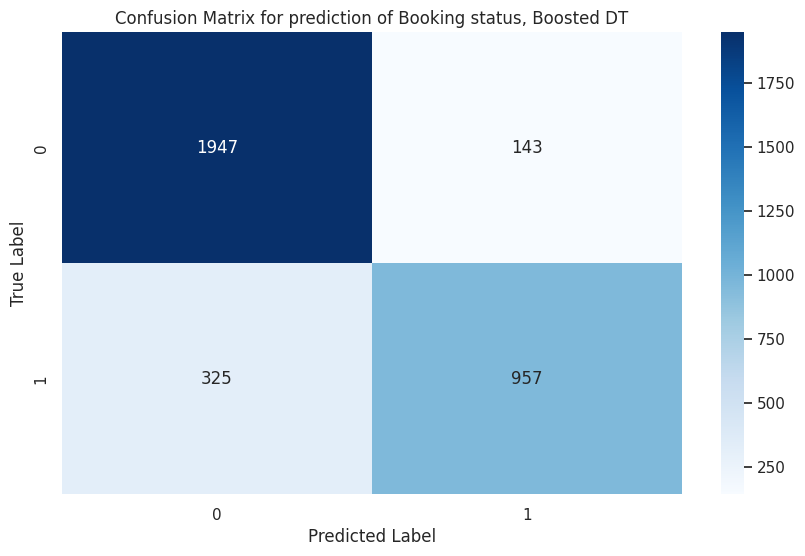

In [46]:
from sklearn import metrics #metric to evaluate efficacy of model on test split
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve

cm_bm = metrics.confusion_matrix(y_test, y_pred_bm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_bm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Booking status, Boosted DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

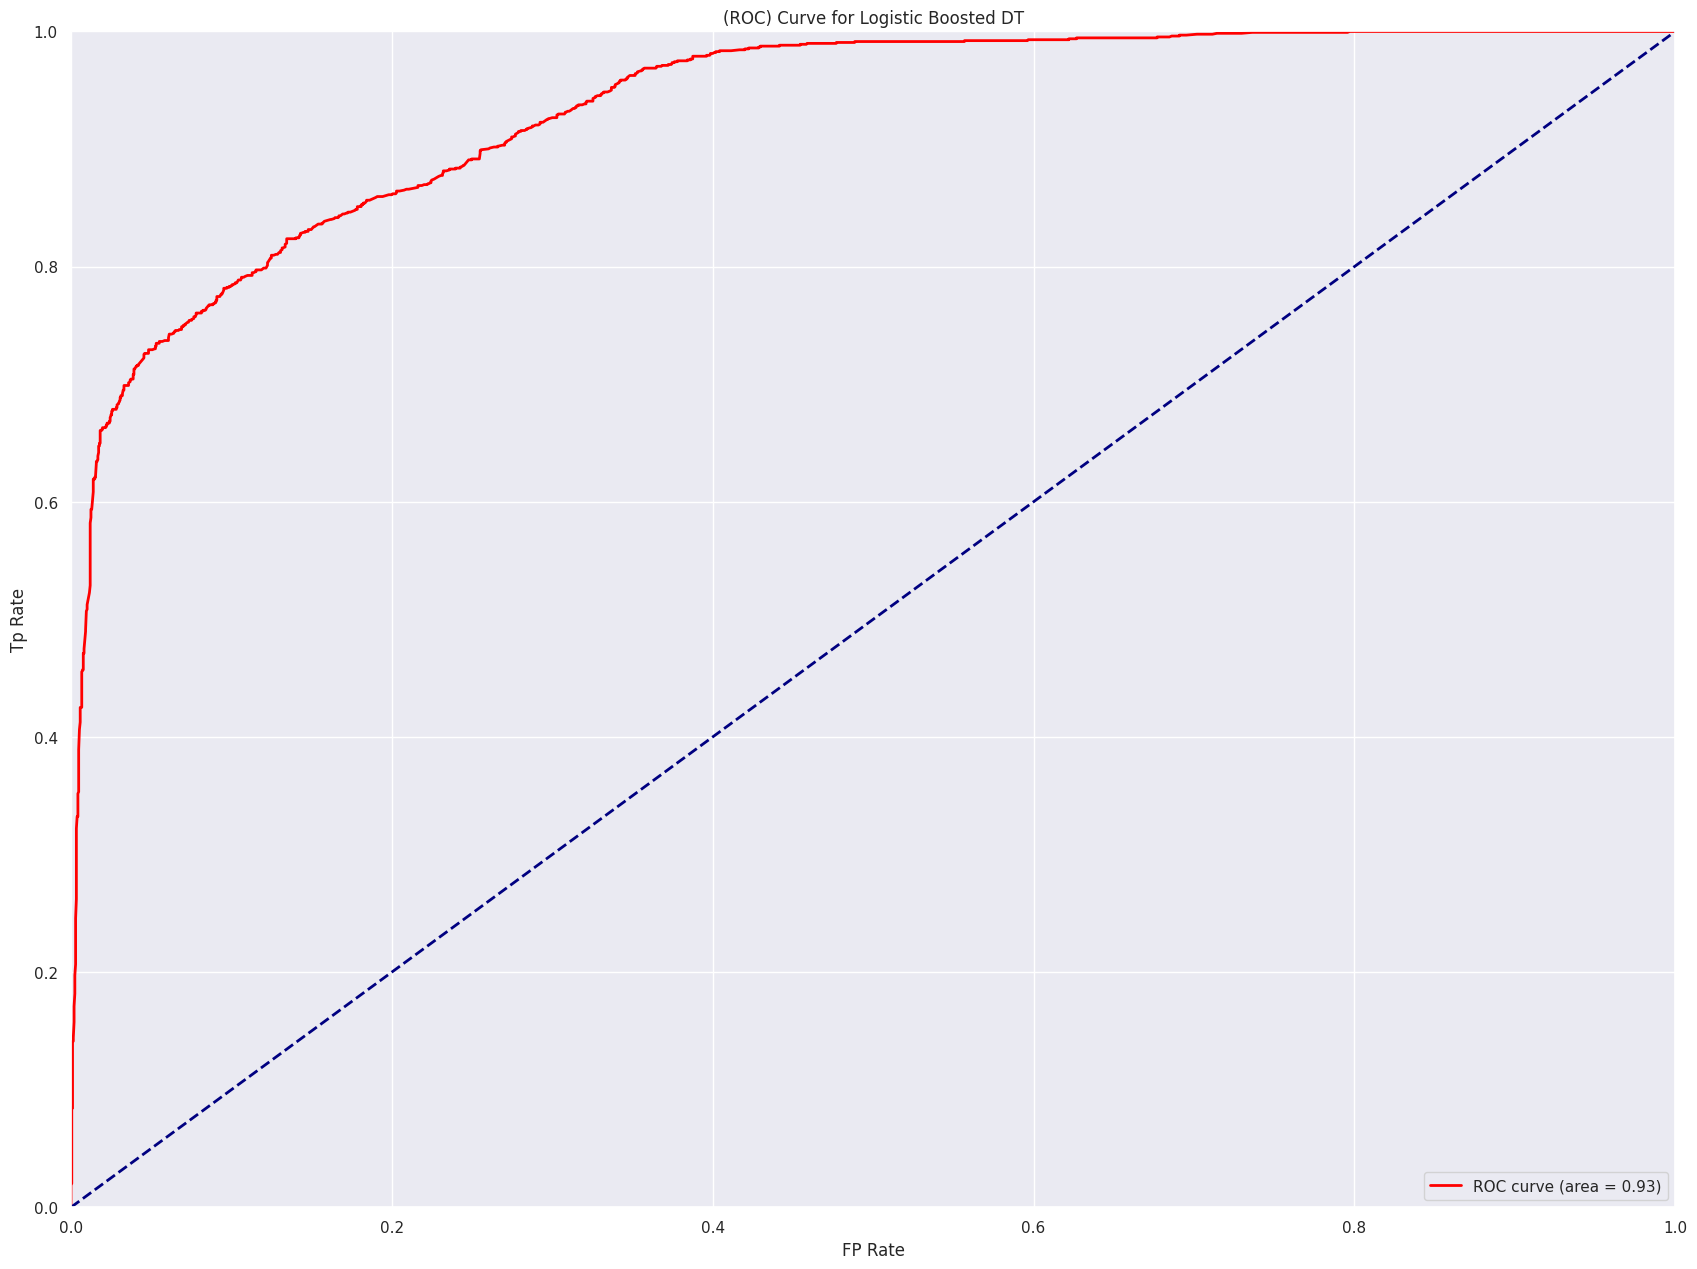

In [47]:
y_pred_prob_bm = boosted_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_bm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Logistic Boosted DT')
plt.legend(loc="lower right")
plt.show()

In [49]:
from sklearn.metrics import f1_score, precision_score, recall_score

F1 = f1_score(y_test, y_pred)
print("F1 Score:", F1)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.8073394495412842
Precision: 0.8673835125448028
Recall: 0.7550702028081123


### Summarizing supervised learning results

Overall our feature selection and understanding of the importance of being able to predict collisions vs the severity of collisions lead to models with relatively high accuracy. We find that both algorithms tested (decision tree & logistic regression) provide relative accuracies (at about 85%/86%).

- Decision trees are effective at determining the logic that points to the correct target variable - with more features with some correlations the accuracy of the tree would improve (as we saw a slight uptick with additional features)

- The logistic regression model requires linearly correlated explanatory variables. Our model produced an approximate 85% accuracy - there is some nuance to this as the accuracy with the null error rate would be at 62% (if the model simply guessed). Given the 23% difference in accuracy, it seems safe to say that our features are well correlated and valuable to the model.

- Applying our boosted decision tree to the proble, we also obtain precisin and recall scores, commonplace for evaluating binary classification problems: Our precision was found to be 0.87 and recall of 0.755, with an F1 score of 0.81. Our ROC score was 0.93, showcasing our model's substantial imrpovement over a baseline dummy classifer in terms of identifying positive classes from negatives.



